## Stakeholder: Real Estate Agency seeking a model to determine price of homes.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Disabling pretty printing
%pprint

Pretty printing has been turned OFF


In [3]:
#Loading in original dataset
df_original = pd.read_csv('/Users/Arsh/Documents/GitHub/dsc-phase-2-project-v2-3/data/kc_house_data.csv')

### Viewing the data

In [4]:
#Checking the data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking NA values
df_original.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the data
df_original.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### Cleaning the data

In [7]:
#Making a copy to preserve original dataframe for point of reference
from copy import deepcopy
df = deepcopy(df_original)

In [8]:
#Sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Dropping NAN values from view so we can encode the ordinal values 
df.dropna(subset=['view'], inplace = True)

### Some data is catagorical, converting using OrdinalEncoder

In [10]:
# Selecting columns to convert
ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

condition          grade  view
0        Average      7 Average  NONE
1        Average      7 Average  NONE
2        Average  6 Low Average  NONE
3      Very Good      7 Average  NONE
4        Average         8 Good  NONE
...          ...            ...   ...
21592    Average         8 Good  NONE
21593    Average         8 Good  NONE
21594    Average      7 Average  NONE
21595    Average         8 Good  NONE
21596    Average      7 Average  NONE

[21534 rows x 3 columns]

In [11]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Ordering the items
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [13]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [14]:
#create dataframe of ordinal data
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

condition  grade  view
0            2.0    4.0   0.0
1            2.0    4.0   0.0
2            2.0    3.0   0.0
3            4.0    4.0   0.0
4            2.0    5.0   0.0
...          ...    ...   ...
21529        2.0    5.0   0.0
21530        2.0    5.0   0.0
21531        2.0    4.0   0.0
21532        2.0    5.0   0.0
21533        2.0    4.0   0.0

[21534 rows x 3 columns]

In [15]:
#input ordinal data into df
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [16]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [17]:
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       26
10.0      13
0.0        1
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [18]:
df['grade_num'] = np.where(df['grade_num'] == 0.0, 1.0, df['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [19]:
#Sanity check
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       27
10.0      13
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [20]:
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['view'].value_counts())

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64
7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num           62
grade_num          62
view_num           62
dtype: int64

In [23]:
#after too much time, we couldnt discover to source of 62 NAN's appearing. so we drop them
df.dropna(subset=['view_num', 'cond_num', 'grade_num'], inplace = True)

In [24]:
#sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2359
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3818
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [25]:
#The basement datatype should be numeric, however it was an object containing "?"" values. 
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
#sanity check
df['sqft_basement'].isna().sum()

451

In [26]:
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21021 non-null  int64  
 1   date           21021 non-null  object 
 2   price          21021 non-null  float64
 3   bedrooms       21021 non-null  int64  
 4   bathrooms      21021 non-null  float64
 5   sqft_living    21021 non-null  int64  
 6   sqft_lot       21021 non-null  int64  
 7   floors         21021 non-null  float64
 8   waterfront     18699 non-null  object 
 9   view           21021 non-null  object 
 10  condition      21021 non-null  object 
 11  grade          21021 non-null  object 
 12  sqft_above     21021 non-null  int64  
 13  sqft_basement  21021 non-null  float64
 14  yr_built       21021 non-null  int64  
 15  yr_renovated   17290 non-null  float64
 16  zipcode        21021 non-null  int64  
 17  lat            21021 non-null  float64
 18  long  

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21021 non-null  int64         
 1   date           21021 non-null  datetime64[ns]
 2   price          21021 non-null  float64       
 3   bedrooms       21021 non-null  int64         
 4   bathrooms      21021 non-null  float64       
 5   sqft_living    21021 non-null  int64         
 6   sqft_lot       21021 non-null  int64         
 7   floors         21021 non-null  float64       
 8   waterfront     18699 non-null  object        
 9   view           21021 non-null  object        
 10  condition      21021 non-null  object        
 11  grade          21021 non-null  object        
 12  sqft_above     21021 non-null  int64         
 13  sqft_basement  21021 non-null  float64       
 14  yr_built       21021 non-null  int64         
 15  yr_renovated   1729

<AxesSubplot:>

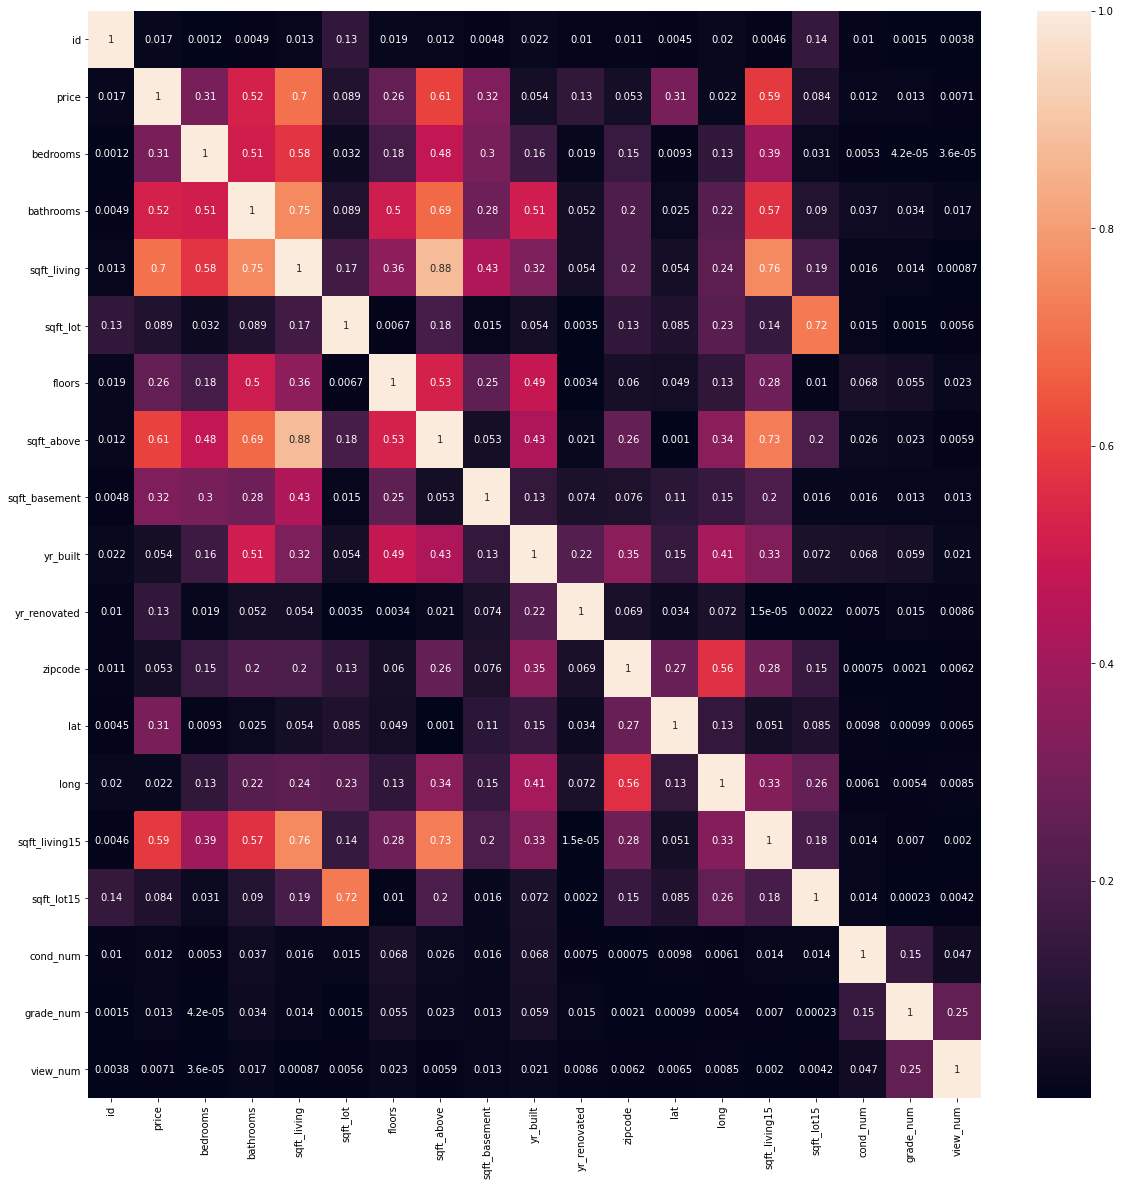

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().abs(), annot = True)

In [31]:
#plt.figure(figsize = (20,20))
#sns.pairplot(df, corner = True)

In [32]:
df.loc[df['floors'] == 1.5, 'floors'] = 1.0
df.loc[df['floors'] == 2.5, 'floors'] = 2.0
df.loc[df['floors'] == 3.5, 'floors'] = 3.0

### Prelim Findings from heatmap/correlations

Price has the highest corr with sqft living, followed by bathrooms, sqft living15, bedrooms, floors, lat

Stronng co-linearity with sqft living, sqft above, and sqft basement as sqft living = sqft above + basement. Thus above and basement are somewhat redundant. we will revist after additional columns have been removed/added and data is thoroughly cleaned

Sqft living has the highest corr with bathrooms, price, bedrooms, sqft above, basement, floor

In [33]:
# columns to make, bed/bath, sqft_avg_above/floor, binary basement or no, binary renovated or no, waterfront or no, city or town binary

In [34]:
df = df.drop(columns = ['id', 'date', 'lat', 'long', 'view', 'grade', 'condition'])
#dropping these columns, ID and Date tell us nothing. 
#lat and long are columns we do not plan to use. for neighborhood data we will use zipcode. 
#and view/grade/ condition are now redundent

In [35]:
#sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2

In [36]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2322
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3731
zipcode             0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [37]:
df['bed/bath'] = df['bedrooms'] / df['bathrooms']
df['avg_fl_space'] = df['sqft_above'] / df['floors']

In [38]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
 17  bed/bath       21021 non-null  float64
 18  avg_fl

In [39]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     1948.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:57   Log-Likelihood:            -2.8997e+05
No. Observations:               21021   AIC:                         5.800e+05
Df Residuals:                   21005   BIC:                         5.801e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.286e+06   3.41e+06     -2.139      0.032    -1.4e+07   -6.08e+05
bedrooms       -1.36e+05   3904.050    -34.835      0.000   -1.44e+05   -1.28e+05
bathrooms      1.923e+05   6814.445     28.214      0.000    1.79e+05    2.06e+05
sqft_living     144.1157      3.116     46.243      0.000     138.007     150.224
sqft_lot         -0.0237      0.057     -0.414      0.679      -0.136       0.089
floors         1.206e+05   8080.440     14.928      0.000    1.05e+05    1.36e+05
sqft_above       39.5086      4.374      9.032      0.000      30.935      48.082
sqft_basement   104.6082      3.501     29.876      0.000      97.745     111.471
yr_built      -3532.1573     77.320    -45.683      0.000   -3683.710   -3380.605
zipcode         139.6816     34.247      4.079      0.000      72.555     206.808
sqft_living15   105.2830      3.835     27.453      0.000      97.766     112.800
sqft_lot15       -0.6670      0.088     -7.612      0.000      -0.839      -0.495
cond_num      -3329.5933   2556.536     -1.302      0.193   -8340.600    1681.414
grade_num      2610.0433   1464.926      1.782      0.075    -261.323    5481.410
view_num       1950.9421   2215.788      0.880      0.379   -2392.172    6294.056
bed/bath       1.385e+05   6203.502     22.328      0.000    1.26e+05    1.51e+05
avg_fl_space     90.7167      9.309      9.745      0.000      72.470     108.963
==============================================================================
Omnibus:                    14227.087   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590015.476
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      28.377   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
df.dropna(subset = ['yr_renovated'], inplace = True)
df['renovate_bool'] = np.where(df['yr_renovated'] > 0.0, 1.0, df['yr_renovated']) 
df['renovate_bool'] = df['renovate_bool'].astype(int)
df['renovate_bool'] = df['renovate_bool'].astype(int)

In [41]:
df.dropna(subset = ['waterfront'], inplace = True)
df['water_bool'] = df['waterfront'].str.replace("NO", "0")
df['water_bool'] = df['water_bool'].str.replace("YES", "1")
df['water_bool'] = df['water_bool'].astype(int)

In [42]:
df['base_bool'] = np.where(df['sqft_basement'] > 0.0, 1.0, df['sqft_basement'])
df['base_bool'] = df['base_bool'].astype(int)

In [43]:
df.bedrooms = df.bedrooms.astype(int)
df.cond_num = df.cond_num.astype(int)
df.grade_num = df.grade_num.astype(int)
df.view_num = df.view_num.astype(int)
df.yr_built = df.yr_built.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.renovate_bool = df.renovate_bool.astype(int)
df.base_bool = df.base_bool.astype(int)
df.water_bool = df.water_bool.astype(int)
df.price=df.price.astype(float)
df.bedrooms=df.bedrooms.astype(float)
df.floors=df.floors.astype(float)
df['bed/bath']=df['bed/bath'].astype(float)
df.avg_fl_space=df.avg_fl_space.astype(float)
df.sqft_living=df.sqft_living.astype(float)
df.sqft_living15=df.sqft_living15.astype(float)
df.sqft_lot=df.sqft_lot.astype(float)
df.sqft_lot15=df.sqft_lot15.astype(float)
df.sqft_above=df.sqft_above.astype(float)
df.sqft_basement=df.sqft_basement.astype(float)

In [44]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']
#repeating the model with new derived columns
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1364.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:57   Log-Likelihood:            -2.1191e+05
No. Observations:               15390   AIC:                         4.239e+05
Df Residuals:                   15371   BIC:                         4.240e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.305e+06   3.92e+06     -1.100      0.272    -1.2e+07    3.37e+06
bedrooms      -1.277e+05   4464.306    -28.602      0.000   -1.36e+05   -1.19e+05
bathrooms      1.839e+05   7800.054     23.577      0.000    1.69e+05    1.99e+05
sqft_living     137.2975      3.978     34.511      0.000     129.499     145.096
sqft_lot         -0.0411      0.064     -0.644      0.519      -0.166       0.084
floors         1.023e+05   9311.534     10.984      0.000     8.4e+04    1.21e+05
sqft_above       67.6309      5.526     12.239      0.000      56.799      78.463
sqft_basement    69.6725      5.742     12.134      0.000      58.418      80.927
yr_built      -3366.7990     91.917    -36.629      0.000   -3546.967   -3186.631
zipcode         106.1561     39.356      2.697      0.007      29.013     183.299
sqft_living15    92.5798      4.393     21.077      0.000      83.970     101.190
sqft_lot15       -0.6260      0.097     -6.442      0.000      -0.816      -0.436
cond_num      -2586.6365   2918.907     -0.886      0.376   -8308.039    3134.766
grade_num      3306.0286   1680.410      1.967      0.049      12.227    6599.830
view_num        190.9034   2514.534      0.076      0.939   -4737.880    5119.687
bed/bath       1.354e+05   7130.296     18.990      0.000    1.21e+05    1.49e+05
avg_fl_space     72.2868     10.700      6.756      0.000      51.314      93.259
renovate_bool  3.024e+04   9887.055      3.058      0.002    1.09e+04    4.96e+04
water_bool     7.222e+05    2.2e+04     32.807      0.000    6.79e+05    7.65e+05
base_bool      3.853e+04   7116.503      5.415      0.000    2.46e+04    5.25e+04
==============================================================================
Omnibus:                     9827.342   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413167.100
Skew:                           2.481   Prob(JB):                         0.00
Kurtosis:                      27.893   Cond. No.                     6.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Viewing the P vales, we can conclude that sqft_lot as well as our derived ordinal columns have no substantial impact on our R2

In [45]:
#we dropped all the rows that have NaNs as we beleive we have enough datapoints to run ours models.
df = df.dropna()
df.isna().sum()
df.shape

(15390, 22)

In [46]:
#loading in zipcode data
zipcodes = pd.read_csv("/Users/Arsh/Documents/GitHub/Phase_2_Project/zipcodes.csv")
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop(columns = ['Unnamed: 0', 'Timezone', 'Classification', "Area Code(s)"], inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)
zipcodes.head()

zipcode         City  Population
0    98001       Auburn       31911
1    98002       Auburn       31647
2    98003  Federal Way       44151
3    98004     Bellevue       27946
4    98005     Bellevue       17714

In [47]:
#mergeing into main dataframe
df = df.merge(zipcodes, on='zipcode', how='left')
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0   538000.0       3.0       2.25       2570.0    7242.0     2.0         NO   
1   604000.0       4.0       3.00       1960.0    5000.0     1.0         NO   
2   510000.0       3.0       2.00       1680.0    8080.0     1.0         NO   
3  1230000.0       4.0       4.50       5420.0  101930.0     1.0         NO   
4   229500.0       3.0       1.00       1780.0    7470.0     1.0         NO   

   sqft_above  sqft_basement  yr_built  ...  cond_num  grade_num  view_num  \
0      2170.0          400.0      1951  ...         2          4         0   
1      1050.0          910.0      1965  ...         4          4         0   
2      1680.0            0.0      1987  ...         2          5         0   
3      3890.0         1530.0      2001  ...         2          8         0   
4      1050.0          730.0      1960  ...         2          4         0   

   bed/bath  avg_fl_space  renovate_bool  water_bool  base_bool       City  \
0  1.333333        1085.0              1           0          1    Seattle   
1  1.333333        1050.0              0           0          1    Seattle   
2  1.500000        1680.0              0           0          0  Sammamish   
3  0.888889        3890.0              0           0          1    Redmond   
4  3.000000        1050.0              0           0          1    Seattle   

   Population  
0       37081  
1       14770  
2       25748  
3       18784  
4       25922  

[5 rows x 24 columns]

In [48]:
#creating dummies for the catagorical nominal data of cities. 
X_city = pd.get_dummies(df['City'], drop_first = True)

df_cities = pd.concat([df, X_city], axis = 1)
df_cities.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0   538000.0       3.0       2.25       2570.0    7242.0     2.0         NO   
1   604000.0       4.0       3.00       1960.0    5000.0     1.0         NO   
2   510000.0       3.0       2.00       1680.0    8080.0     1.0         NO   
3  1230000.0       4.0       4.50       5420.0  101930.0     1.0         NO   
4   229500.0       3.0       1.00       1780.0    7470.0     1.0         NO   

   sqft_above  sqft_basement  yr_built  ...  Medina  Mercer Island  \
0      2170.0          400.0      1951  ...       0              0   
1      1050.0          910.0      1965  ...       0              0   
2      1680.0            0.0      1987  ...       0              0   
3      3890.0         1530.0      2001  ...       0              0   
4      1050.0          730.0      1960  ...       0              0   

   North Bend  Redmond  Renton  Sammamish  Seattle  Snoqualmie  Vashon  \
0           0        0       0          0        1           0       0   
1           0        0       0          0        1           0       0   
2           0        0       0          1        0           0       0   
3           0        1       0          0        0           0       0   
4           0        0       0          0        1           0       0   

   Woodinville  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 47 columns]

In [49]:
#creating dummies for the catagorical nominal data of cities. 
X_zip = pd.get_dummies(df['zipcode'], drop_first = True)

df_zip = pd.concat([df, X_zip], axis = 1)
df_zip.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0   538000.0       3.0       2.25       2570.0    7242.0     2.0         NO   
1   604000.0       4.0       3.00       1960.0    5000.0     1.0         NO   
2   510000.0       3.0       2.00       1680.0    8080.0     1.0         NO   
3  1230000.0       4.0       4.50       5420.0  101930.0     1.0         NO   
4   229500.0       3.0       1.00       1780.0    7470.0     1.0         NO   

   sqft_above  sqft_basement  yr_built  ...  98146  98148  98155  98166  \
0      2170.0          400.0      1951  ...      0      0      0      0   
1      1050.0          910.0      1965  ...      0      0      0      0   
2      1680.0            0.0      1987  ...      0      0      0      0   
3      3890.0         1530.0      2001  ...      0      0      0      0   
4      1050.0          730.0      1960  ...      1      0      0      0   

   98168  98177  98178  98188  98198  98199  
0      0      0      0      0      0      0  
1      0      0      0      0      0      0  
2      0      0      0      0      0      0  
3      0      0      0      0      0      0  
4      0      0      0      0      0      0  

[5 rows x 93 columns]

In [50]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15390 entries, 0 to 15389
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15390 non-null  float64
 1   bedrooms       15390 non-null  float64
 2   bathrooms      15390 non-null  float64
 3   sqft_living    15390 non-null  float64
 4   sqft_lot       15390 non-null  float64
 5   floors         15390 non-null  float64
 6   waterfront     15390 non-null  object 
 7   sqft_above     15390 non-null  float64
 8   sqft_basement  15390 non-null  float64
 9   yr_built       15390 non-null  int64  
 10  yr_renovated   15390 non-null  int64  
 11  zipcode        15390 non-null  int64  
 12  sqft_living15  15390 non-null  float64
 13  sqft_lot15     15390 non-null  float64
 14  cond_num       15390 non-null  int64  
 15  grade_num      15390 non-null  int64  
 16  view_num       15390 non-null  int64  
 17  bed/bath       15390 non-null  float64
 18  avg_fl

In [51]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_cities.drop(columns= not_included)
y = df_cities['price']
#repeating the model with cities as dummies
model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     948.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:58   Log-Likelihood:            -2.0940e+05
No. Observations:               15390   AIC:                         4.189e+05
Df Residuals:                   15347   BIC:                         4.192e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.036e+08   8.02e+06     25.373      0.000    1.88e+08    2.19e+08
bedrooms      -1.016e+05   3829.608    -26.518      0.000   -1.09e+05    -9.4e+04
bathrooms      1.446e+05   6676.660     21.659      0.000    1.32e+05    1.58e+05
sqft_living     144.3895      3.398     42.494      0.000     137.729     151.050
sqft_lot          0.1847      0.055      3.370      0.001       0.077       0.292
floors         4522.3365   8219.061      0.550      0.582   -1.16e+04    2.06e+04
sqft_above      102.7903      4.767     21.564      0.000      93.447     112.134
sqft_basement    41.5992      4.927      8.443      0.000      31.942      51.257
yr_built      -1577.3439     86.383    -18.260      0.000   -1746.665   -1408.023
zipcode       -2049.1350     82.161    -24.940      0.000   -2210.181   -1888.089
sqft_living15    74.9576      3.914     19.153      0.000      67.286      82.629
sqft_lot15       -0.2092      0.085     -2.462      0.014      -0.376      -0.043
cond_num       -925.1876   2485.029     -0.372      0.710   -5796.139    3945.764
grade_num      1024.2094   1431.026      0.716      0.474   -1780.771    3829.190
view_num       -734.6190   2139.732     -0.343      0.731   -4928.747    3459.509
bed/bath       1.051e+05   6092.953     17.253      0.000    9.32e+04    1.17e+05
avg_fl_space     -5.8048      9.215     -0.630      0.529     -23.867      12.257
renovate_bool    3.5e+04   8443.769      4.145      0.000    1.84e+04    5.16e+04
water_bool      7.57e+05   1.91e+04     39.646      0.000     7.2e+05    7.94e+05
base_bool      6190.9828   6126.909      1.010      0.312   -5818.485    1.82e+04
Population       -0.9971      0.195     -5.100      0.000      -1.380      -0.614
Bellevue       3.142e+05   1.06e+04     29.735      0.000    2.93e+05    3.35e+05
Black Diamond -2.602e+04    2.6e+04     -1.001      0.317    -7.7e+04    2.49e+04
Bothell        4.159e+04   1.88e+04      2.216      0.027    4794.768    7.84e+04
Carnation      1.274e+04   2.32e+04      0.549      0.583   -3.27e+04    5.82e+04
Duvall        -4805.2040   1.99e+04     -0.241      0.809   -4.38e+04    3.42e+04
Enumclaw      -1.166e+04   1.75e+04     -0.666      0.506    -4.6e+04    2.27e+04
Fall City      6.973e+04   2.79e+04      2.501      0.012    1.51e+04    1.24e+05
Federal Way   -3.967e+04   1.16e+04     -3.419      0.001   -6.24e+04   -1.69e+04
Issaquah       1.432e+05   1.18e+04     12.137      0.000     1.2e+05    1.66e+05
Kenmore        8.006e+04    1.6e+04      4.997      0.000    4.87e+04    1.11e+05
Kent           1.319e+04   1.02e+04      1.291      0.197   -6830.225    3.32e+04
Kirkland       2.808e+05   1.08e+04     26.058      0.000     2.6e+05    3.02e+05
Maple Valley   2.237e+04   1.24e+04      1.809      0.071   -1871.987    4.66e+04
Medina         1.203e+06    3.5e+04     34.378   

In [147]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with zip codesas dummies
model_4 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     686.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:14:50   Log-Likelihood:            -2.0146e+05
No. Observations:               15025   AIC:                         4.031e+05
Df Residuals:                   14938   BIC:                         4.038e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9938.2565    489.159    -20.317      0.000   -1.09e+04   -8979.445
bedrooms      -8.854e+04   3462.455    -25.570      0.000   -9.53e+04   -8.17e+04
bathrooms      1.247e+05   5766.465     21.625      0.000    1.13e+05    1.36e+05
sqft_living     151.9395      2.969     51.184      0.000     146.121     157.758
sqft_lot          0.2902      0.045      6.398      0.000       0.201       0.379
floors        -8.519e+04   7237.635    -11.771      0.000   -9.94e+04    -7.1e+04
sqft_above      116.1454      4.082     28.451      0.000     108.144     124.147
sqft_basement    35.7942      4.199      8.524      0.000      27.564      44.025
yr_built       -247.6599     76.372     -3.243      0.001    -397.358     -97.962
zipcode           5.4985      1.500      3.665      0.000       2.558       8.439
sqft_living15    55.5423      3.367     16.497      0.000      48.943      62.142
sqft_lot15       -0.0904      0.071     -1.273      0.203      -0.230       0.049
cond_num       1715.9673   2068.545      0.830      0.407   -2338.634    5770.569
grade_num      1652.9413   1190.941      1.388      0.165    -681.449    3987.332
view_num       -670.7014   1784.836     -0.376      0.707   -4169.199    2827.797
bed/bath       9.552e+04   5279.943     18.091      0.000    8.52e+04    1.06e+05
avg_fl_space    -58.0914      8.003     -7.259      0.000     -73.778     -42.405
renovate_bool  3.444e+04   7144.555      4.820      0.000    2.04e+04    4.84e+04
water_bool     8.527e+05   1.63e+04     52.356      0.000    8.21e+05    8.85e+05
base_bool     -2.734e+04   5227.364     -5.230      0.000   -3.76e+04   -1.71e+04
Population       -9.3079      0.372    -25.017      0.000     -10.037      -8.579
98002          3.103e+04   1.71e+04      1.816      0.069   -2468.771    6.45e+04
98003           1.22e+05   1.82e+04      6.703      0.000    8.63e+04    1.58e+05
98004          7.591e+05   1.43e+04     53.129      0.000    7.31e+05    7.87e+05
98005          2.059e+05   1.55e+04     13.282      0.000    1.76e+05    2.36e+05
98006          3.546e+05   1.49e+04     23.768      0.000    3.25e+05    3.84e+05
98007          2.072e+05   1.85e+04     11.222      0.000    1.71e+05    2.43e+05
98008          2.167e+05   1.38e+04     15.742      0.000     1.9e+05    2.44e+05
98010         -1.941e+05    1.9e+04    -10.241      0.000   -2.31e+05   -1.57e+05
98011          9.002e+04   1.68e+04      5.349      0.000     5.7e+04    1.23e+05
98014          -1.65e+05   1.71e+04     -9.672      0.000   -1.98e+05   -1.32e+05
98019         -1.482e+05   1.49e+04     -9.920      0.000   -1.77e+05   -1.19e+05
98022         -8.538e+04   1.44e+04     -5.918      0.000   -1.14e+05   -5.71e+04
98023          1.299e+05   1.78e+04      7.290      0.000     9.5e+04    1.65e+05
98024         -1.169e+05   2.05e+04     -5.705   

In [53]:
df_all = pd.concat([df_zip, X_city], axis = 1)
df_all.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0   538000.0       3.0       2.25       2570.0    7242.0     2.0         NO   
1   604000.0       4.0       3.00       1960.0    5000.0     1.0         NO   
2   510000.0       3.0       2.00       1680.0    8080.0     1.0         NO   
3  1230000.0       4.0       4.50       5420.0  101930.0     1.0         NO   
4   229500.0       3.0       1.00       1780.0    7470.0     1.0         NO   

   sqft_above  sqft_basement  yr_built  ...  Medina  Mercer Island  \
0      2170.0          400.0      1951  ...       0              0   
1      1050.0          910.0      1965  ...       0              0   
2      1680.0            0.0      1987  ...       0              0   
3      3890.0         1530.0      2001  ...       0              0   
4      1050.0          730.0      1960  ...       0              0   

   North Bend  Redmond  Renton  Sammamish  Seattle  Snoqualmie  Vashon  \
0           0        0       0          0        1           0       0   
1           0        0       0          0        1           0       0   
2           0        0       0          1        0           0       0   
3           0        1       0          0        0           0       0   
4           0        0       0          0        1           0       0   

   Woodinville  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 116 columns]

In [54]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with cities as dummies
model_5 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     715.9
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:58   Log-Likelihood:            -2.0712e+05
No. Observations:               15390   AIC:                         4.144e+05
Df Residuals:                   15307   BIC:                         4.150e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9942.5144    510.565    -19.474      0.000   -1.09e+04   -8941.746
bedrooms      -9.042e+04   3325.641    -27.190      0.000   -9.69e+04   -8.39e+04
bathrooms        1.3e+05   5786.845     22.458      0.000    1.19e+05    1.41e+05
sqft_living     160.4851      2.973     53.987      0.000     154.658     166.312
sqft_lot          0.2211      0.036      6.128      0.000       0.150       0.292
floors        -9.605e+04   7409.349    -12.964      0.000   -1.11e+05   -8.15e+04
sqft_above      123.2216      4.176     29.508      0.000     115.036     131.407
sqft_basement    37.2635      4.275      8.717      0.000      28.885      45.642
yr_built       -287.1930     78.317     -3.667      0.000    -440.704    -133.682
zipcode           6.4266      1.534      4.190      0.000       3.420       9.433
sqft_living15    52.1390      3.449     15.116      0.000      45.378      58.900
bed/bath       1.031e+05   5283.607     19.516      0.000    9.28e+04    1.13e+05
avg_fl_space    -70.9378      8.132     -8.723      0.000     -86.878     -54.998
renovate_bool  3.805e+04   7326.758      5.193      0.000    2.37e+04    5.24e+04
water_bool     8.393e+05   1.66e+04     50.588      0.000    8.07e+05    8.72e+05
base_bool     -3.075e+04   5358.965     -5.738      0.000   -4.13e+04   -2.02e+04
Population       -9.5811      0.387    -24.733      0.000     -10.340      -8.822
98002          2.445e+04   1.76e+04      1.388      0.165   -1.01e+04     5.9e+04
98003          1.232e+05    1.9e+04      6.476      0.000    8.59e+04     1.6e+05
98004          7.544e+05   1.49e+04     50.763      0.000    7.25e+05    7.84e+05
98005          1.994e+05   1.62e+04     12.334      0.000    1.68e+05    2.31e+05
98006          3.501e+05   1.55e+04     22.539      0.000     3.2e+05    3.81e+05
98007          2.043e+05   1.89e+04     10.804      0.000    1.67e+05    2.41e+05
98008          2.132e+05   1.43e+04     14.863      0.000    1.85e+05    2.41e+05
98010         -2.006e+05   1.98e+04    -10.148      0.000   -2.39e+05   -1.62e+05
98011          8.885e+04   1.76e+04      5.045      0.000    5.43e+04    1.23e+05
98014         -1.653e+05   1.76e+04     -9.399      0.000      -2e+05   -1.31e+05
98019          -1.49e+05   1.53e+04     -9.720      0.000   -1.79e+05   -1.19e+05
98022         -8.405e+04    1.5e+04     -5.611      0.000   -1.13e+05   -5.47e+04
98023          1.334e+05   1.86e+04      7.159      0.000    9.69e+04     1.7e+05
98024         -1.287e+05   2.14e+04     -6.002      0.000   -1.71e+05   -8.67e+04
98027          1.105e+05   1.34e+04      8.264      0.000    8.43e+04    1.37e+05
98028          1.195e+04   1.36e+04      0.876      0.381   -1.48e+04    3.87e+04
98029          1.464e+05   1.38e+04     10.629      0.000    1.19e+05    1.73e+05
98030          1.715e+04   1.71e+04      1.005   

In [55]:
lr = LinearRegression()

X = df_zip.drop(columns= not_included)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)
print("intercept = ", lr.intercept_)
print('R2 for training = ', lr.score(X_train, y_train))
print('R2 for test = ', lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
MAE = mean_absolute_error(y_pred, y_test)
print("MAE = ", MAE)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ",RMSE)

intercept =  798164796838.3676
R2 for training =  0.7931302378475944
R2 for test =  0.791069675485023
MAE =  102258.10170087015
RMSE =  175321.9379320182


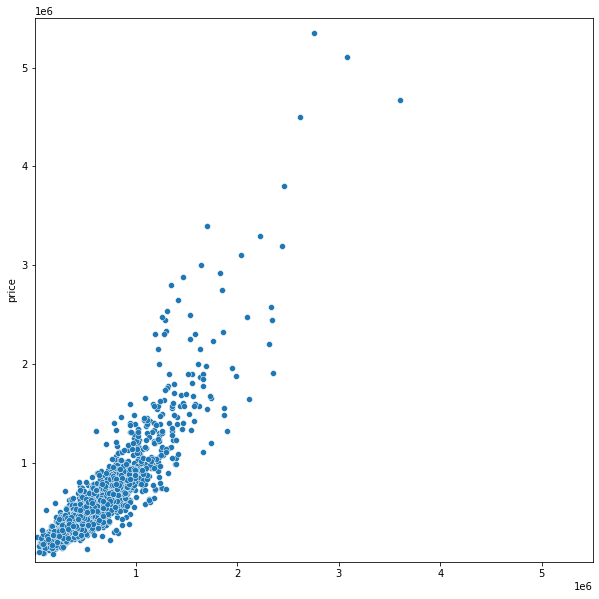

In [56]:
plt.figure(figsize = (10,10))
plt.xlim(1, 5.5e6)
plt.ylim(1,5.5e6)
sns.scatterplot(x = y_pred, y= y_test)
plt.show()

In [57]:
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [58]:
list(df_zip.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'bed/bath', 'avg_fl_space', 'renovate_bool', 'water_bool', 'base_bool', 'City', 'Population', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [59]:
df_zip= data_clean('bedrooms', df_zip)

In [61]:
not_included = ['price','waterfront', 'City', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'base_bool', 'renovate_bool', 'floors', 'avg_fl_space', 'sqft_basement', 'sqft_lot', 'Population']
X = df_zip.drop(columns= not_included)
y = df_zip['price']

#repeating the model after removing all poorly weighted variables
model_8 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     742.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:59   Log-Likelihood:            -2.0157e+05
No. Observations:               15025   AIC:                         4.033e+05
Df Residuals:                   14946   BIC:                         4.039e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.16e+04    581.222    -19.950      0.000   -1.27e+04   -1.05e+04
bedrooms      -9.299e+04   3453.866    -26.924      0.000   -9.98e+04   -8.62e+04
bathrooms      1.201e+05   5757.217     20.858      0.000    1.09e+05    1.31e+05
sqft_living     180.2573      4.035     44.675      0.000     172.348     188.166
sqft_above       52.4771      3.766     13.936      0.000      45.096      59.858
yr_built       -735.3430     67.032    -10.970      0.000    -866.733    -603.953
yr_renovated     12.7797      3.587      3.563      0.000       5.749      19.810
zipcode          11.1870      1.352      8.273      0.000       8.537      13.837
sqft_living15    57.1864      3.379     16.923      0.000      50.563      63.810
bed/bath       1.023e+05   5278.766     19.373      0.000    9.19e+04    1.13e+05
water_bool      8.45e+05   1.64e+04     51.578      0.000    8.13e+05    8.77e+05
98002          2.945e+04   1.73e+04      1.706      0.088   -4394.267    6.33e+04
98003          5715.1889   1.53e+04      0.374      0.708   -2.42e+04    3.56e+04
98004          7.865e+05   1.53e+04     51.533      0.000    7.57e+05    8.16e+05
98005          3.302e+05    1.8e+04     18.371      0.000    2.95e+05    3.65e+05
98006           3.08e+05   1.38e+04     22.258      0.000    2.81e+05    3.35e+05
98007          2.663e+05   1.98e+04     13.474      0.000    2.28e+05    3.05e+05
98008          2.815e+05   1.54e+04     18.245      0.000    2.51e+05    3.12e+05
98010          6.093e+04   2.25e+04      2.711      0.007    1.69e+04    1.05e+05
98011          1.108e+05   1.75e+04      6.342      0.000    7.66e+04    1.45e+05
98014          9.034e+04   2.03e+04      4.459      0.000    5.06e+04     1.3e+05
98019          4.965e+04   1.82e+04      2.734      0.006     1.4e+04    8.52e+04
98022           3.12e+04   1.64e+04      1.898      0.058   -1013.980    6.34e+04
98023         -1.728e+04   1.35e+04     -1.279      0.201   -4.38e+04    9199.011
98024          1.425e+05   2.38e+04      5.987      0.000    9.59e+04    1.89e+05
98027           1.61e+05   1.42e+04     11.298      0.000    1.33e+05    1.89e+05
98028          1.163e+05   1.54e+04      7.532      0.000     8.6e+04    1.47e+05
98029          2.113e+05   1.49e+04     14.212      0.000    1.82e+05     2.4e+05
98030         -1653.1286    1.6e+04     -0.103      0.918   -3.31e+04    2.98e+04
98031          2.179e+04   1.56e+04      1.395      0.163   -8833.347    5.24e+04
98032          1.614e+04   1.96e+04      0.825      0.409   -2.22e+04    5.45e+04
98033          3.795e+05    1.4e+04     27.158      0.000    3.52e+05    4.07e+05
98034          2.199e+05   1.33e+04     16.509      0.000    1.94e+05    2.46e+05
98038          2.156e+04   1.31e+04      1.644      0.100   -4153.569    4.73e+04
98039          1.205e+06   3.05e+04     39.548   

In [62]:
df_standard = df_zip.drop(columns=['waterfront', 'City', 'yr_built', 'yr_renovated'])
df_standard1 = df_standard.apply(lambda x: (x-x.mean())/ x.std())
df_standard2 = df_standard1.drop(columns=['price'])
df_standard_aug = sm.add_constant(df_standard2)
y_standard = df_standard1['price']
results_standardized = sm.OLS(y_standard, df_standard_aug).fit()

In [63]:
results_standardized.rsquared

0.797957672067389

In [64]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     694.1
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:59   Log-Likelihood:                -9304.5
No. Observations:               15025   AIC:                         1.878e+04
Df Residuals:                   14939   BIC:                         1.944e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0013      0.008      0.169      0.866      -0.014       0.017
bedrooms         -0.1976      0.009    -22.909      0.000      -0.214      -0.181
bathrooms         0.2538      0.012     21.125      0.000       0.230       0.277
sqft_living    1.056e+11   5.53e+11      0.191      0.849   -9.79e+11    1.19e+12
sqft_lot          0.0349      0.005      6.525      0.000       0.024       0.045
floors           -0.1439      0.010    -13.899      0.000      -0.164      -0.124
sqft_above    -9.651e+10   5.06e+11     -0.191      0.849   -1.09e+12    8.95e+11
sqft_basement -5.154e+10    2.7e+11     -0.191      0.849   -5.81e+11    4.78e+11
zipcode       -2.035e+10   1.07e+11     -0.191      0.849   -2.29e+11    1.89e+11
sqft_living15     0.1057      0.006     16.479      0.000       0.093       0.118
sqft_lot15       -0.0071      0.006     -1.284      0.199      -0.018       0.004
cond_num          0.0035      0.004      0.935      0.350      -0.004       0.011
grade_num         0.0048      0.004      1.243      0.214      -0.003       0.012
view_num         -0.0014      0.004     -0.362      0.718      -0.009       0.006
bed/bath          0.1711      0.009     18.216      0.000       0.153       0.190
avg_fl_space     -0.0806      0.010     -7.784      0.000      -0.101      -0.060
renovate_bool     0.0223      0.004      5.928      0.000       0.015       0.030
water_bool        0.2016      0.004     52.512      0.000       0.194       0.209
base_bool        -0.0392      0.007     -5.519      0.000      -0.053      -0.025
Population    -6.209e+09   3.25e+10     -0.191      0.849      -7e+10    5.75e+10
98002          2.247e+07   1.18e+08      0.191      0.849   -2.08e+08    2.53e+08
98003          8.946e+08   4.69e+09      0.191      0.849   -8.29e+09    1.01e+10
98004         -1.287e+08   6.74e+08     -0.191      0.849   -1.45e+09    1.19e+09
98005         -5.826e+08   3.05e+09     -0.191      0.849   -6.57e+09     5.4e+09
98006          6.553e+08   3.43e+09      0.191      0.849   -6.07e+09    7.38e+09
98007         -1.284e+08   6.72e+08     -0.191      0.849   -1.45e+09    1.19e+09
98008          -1.76e+08   9.22e+08     -0.191      0.849   -1.98e+09    1.63e+09
98010           -7.7e+08   4.03e+09     -0.191      0.849   -8.68e+09    7.14e+09
98011          2.176e+08   1.14e+09      0.191      0.849   -2.02e+09    2.45e+09
98014         -6.916e+08   3.62e+09     -0.191      0.849   -7.79e+09    6.41e+09
98019         -4.407e+08   2.31e+09     -0.191      0.849   -4.97e+09    4.08e+09
98022          1.987e+08   1.04e+09      0.191      0.849   -1.84e+09    2.24e+09
98023          2.601e+09   1.36e+10      0.191      0.849   -2.41e+10    2.93e+10
98024         -3.643e+08   1.91e+09     -0.191      0.849    -4.1e+09    3.38e+09
98027          9.142e+08   4.79e+09      0.191   

In [65]:
weights = results_standardized.params
weights

const          1.348668e-03
bedrooms      -1.975771e-01
bathrooms      2.537955e-01
sqft_living    1.056003e+11
sqft_lot       3.489085e-02
                   ...     
98177          6.496914e+09
98178          6.919506e+09
98188          5.147749e+09
98198          8.598269e+09
98199          8.094419e+09
Length: 89, dtype: float64

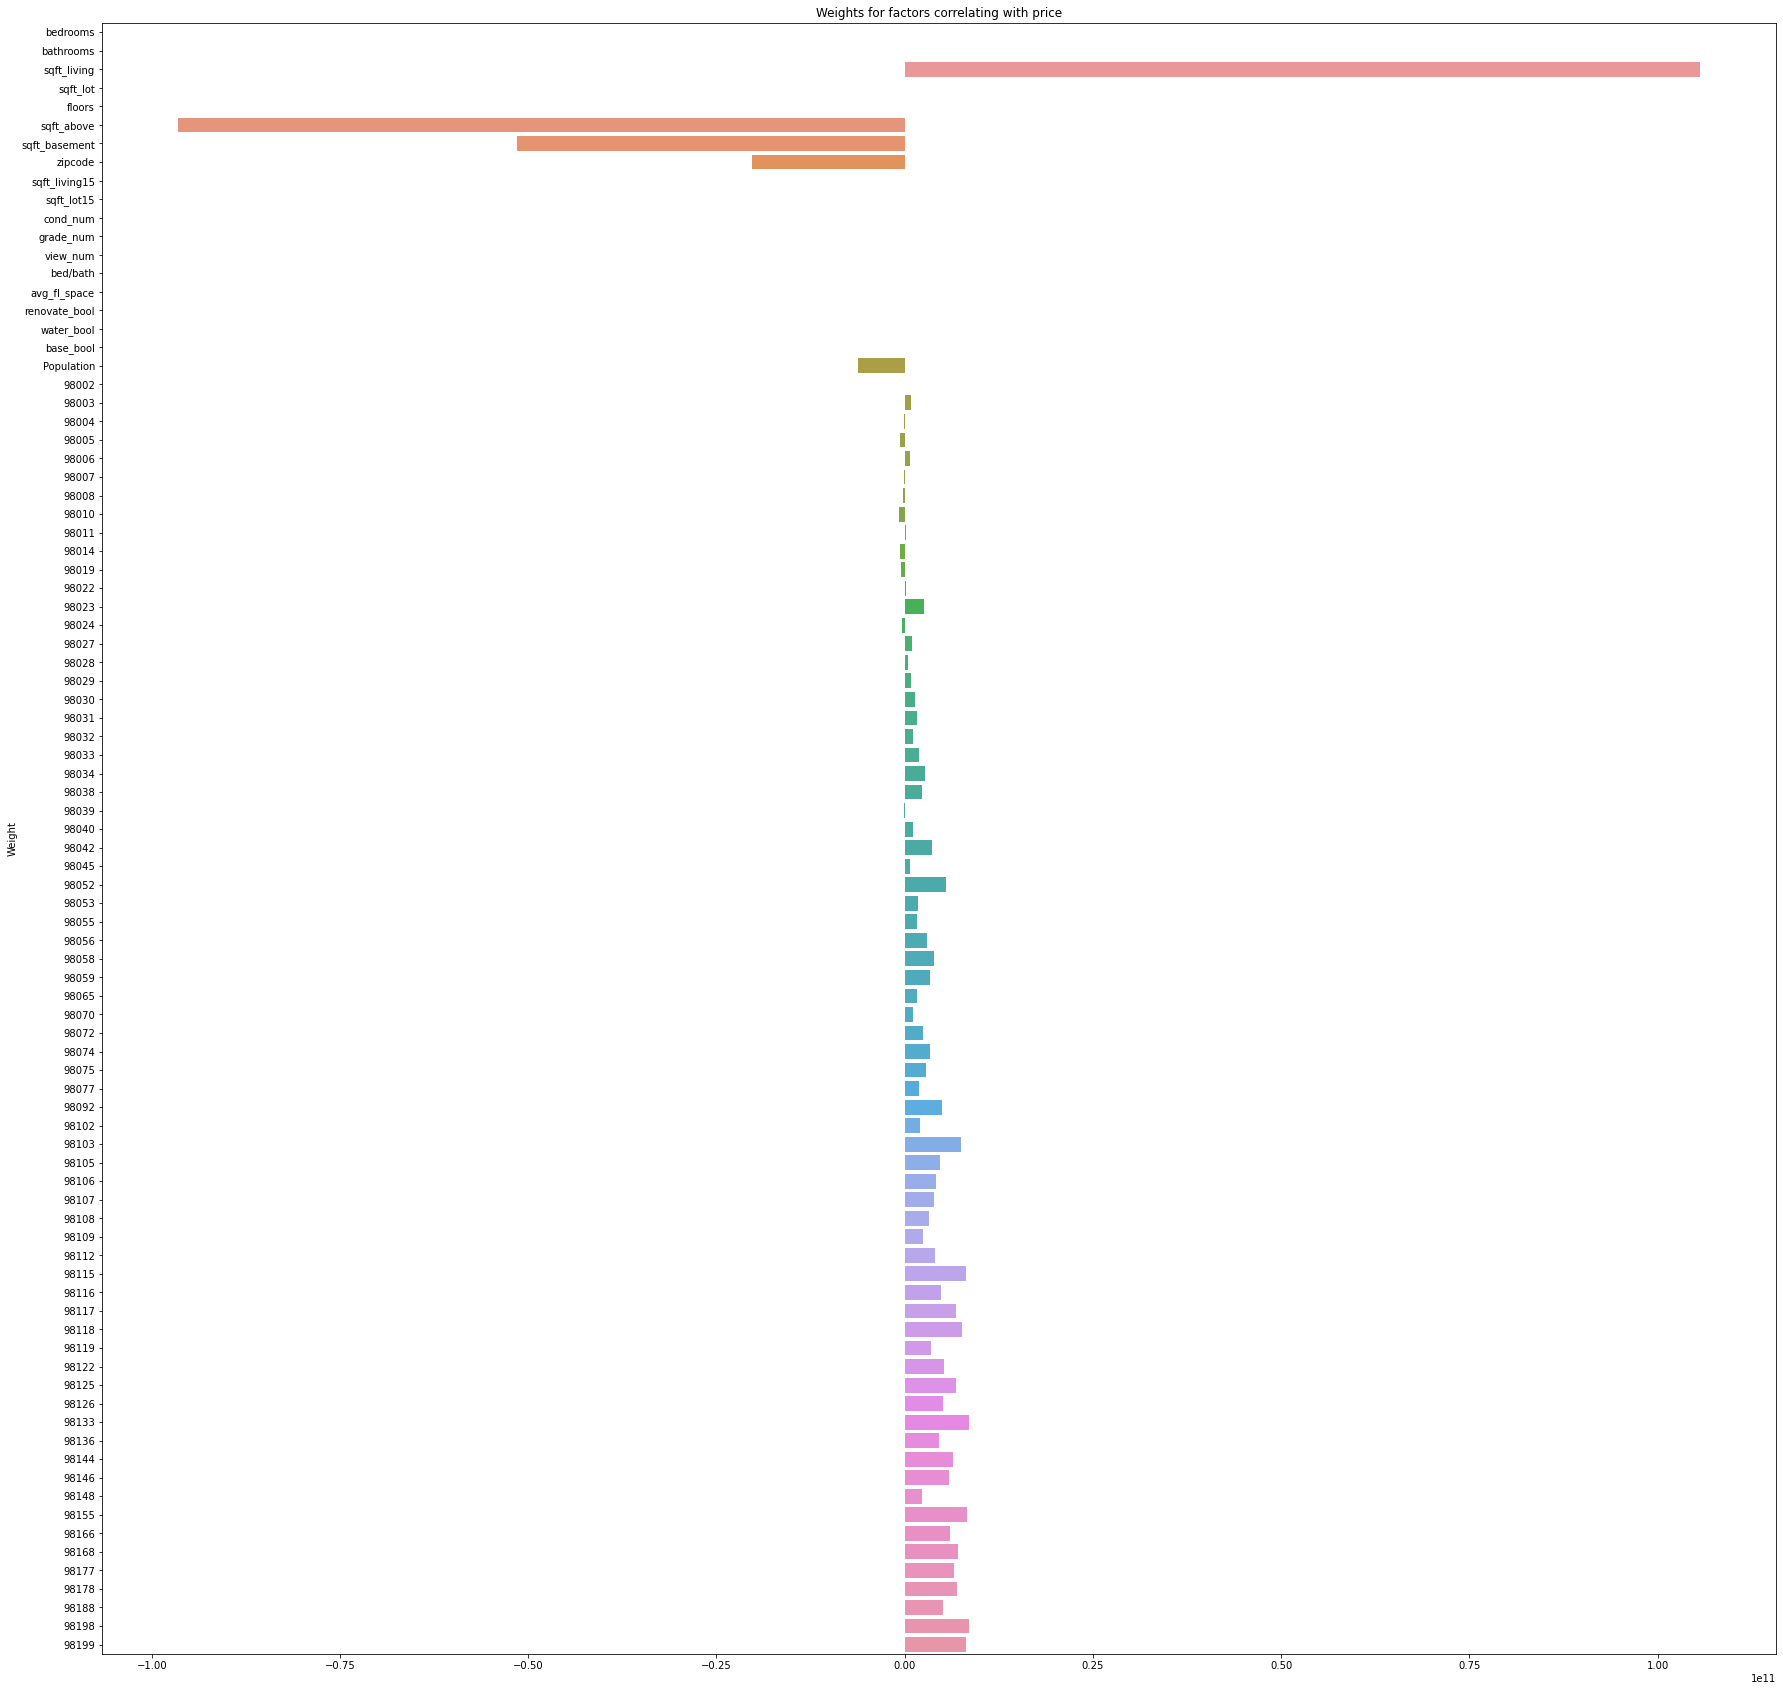

In [66]:
plt.figure(figsize=(30,30))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

In [177]:
df_2mil = df_zip[df_zip['price'] < 2000000]
not_included = ['price','waterfront', 'City', 'yr_renovated','sqft_lot15', 'cond_num', 'grade_num', 'view_num']
X = df_2mil.drop(columns= not_included)
y = df_2mil['price']
#repeating the model after removing houses with prices above 2 million
model_9 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     812.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:25:27   Log-Likelihood:            -1.9542e+05
No. Observations:               14890   AIC:                         3.910e+05
Df Residuals:                   14807   BIC:                         3.916e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9877.1771    368.260    -26.821      0.000   -1.06e+04   -9155.342
bedrooms       -4.69e+04   2683.309    -17.477      0.000   -5.22e+04   -4.16e+04
bathrooms      7.504e+04   4485.336     16.731      0.000    6.63e+04    8.38e+04
sqft_living     111.7529      2.336     47.830      0.000     107.173     116.333
sqft_lot          0.3012      0.027     11.346      0.000       0.249       0.353
floors        -5.425e+04   5565.863     -9.748      0.000   -6.52e+04   -4.33e+04
sqft_above       94.4093      3.214     29.378      0.000      88.110     100.708
sqft_basement    17.3436      3.287      5.277      0.000      10.901      23.786
yr_built       -226.1133     57.921     -3.904      0.000    -339.645    -112.582
zipcode           5.7511      1.136      5.063      0.000       3.524       7.978
sqft_living15    65.0798      2.596     25.073      0.000      59.992      70.167
bed/bath        4.73e+04   4069.126     11.625      0.000    3.93e+04    5.53e+04
avg_fl_space    -36.7876      6.215     -5.919      0.000     -48.970     -24.605
renovate_bool  3.968e+04   5453.861      7.275      0.000     2.9e+04    5.04e+04
water_bool     4.802e+05   1.49e+04     32.164      0.000    4.51e+05    5.09e+05
base_bool     -7653.4006   4003.922     -1.911      0.056   -1.55e+04     194.783
Population       -8.8782      0.283    -31.340      0.000      -9.433      -8.323
98002          2.616e+04   1.29e+04      2.034      0.042     949.327    5.14e+04
98003          1.181e+05   1.37e+04      8.614      0.000    9.12e+04    1.45e+05
98004          6.792e+05    1.1e+04     61.473      0.000    6.58e+05    7.01e+05
98005          2.334e+05   1.17e+04     19.964      0.000     2.1e+05    2.56e+05
98006          3.532e+05   1.13e+04     31.316      0.000    3.31e+05    3.75e+05
98007          2.171e+05   1.39e+04     15.618      0.000     1.9e+05    2.44e+05
98008           2.16e+05   1.04e+04     20.742      0.000    1.96e+05    2.36e+05
98010         -1.724e+05   1.43e+04    -12.043      0.000      -2e+05   -1.44e+05
98011           9.97e+04   1.27e+04      7.872      0.000    7.49e+04    1.25e+05
98014         -1.366e+05   1.29e+04    -10.609      0.000   -1.62e+05   -1.11e+05
98019         -1.307e+05   1.13e+04    -11.588      0.000   -1.53e+05   -1.09e+05
98022         -8.077e+04   1.09e+04     -7.438      0.000   -1.02e+05   -5.95e+04
98023          1.266e+05   1.34e+04      9.427      0.000       1e+05    1.53e+05
98024         -8.246e+04   1.54e+04     -5.350      0.000   -1.13e+05   -5.22e+04
98027          1.305e+05   9680.293     13.480      0.000    1.12e+05    1.49e+05
98028          2.903e+04   9845.984      2.948      0.003    9729.176    4.83e+04
98029          1.647e+05   9905.798     16.629      0.000    1.45e+05    1.84e+05
98030          1.746e+04   1.23e+04      1.422   

In [67]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num', 'bed/bath', 'avg_fl_space', 'renovate_bool', 'water_bool',
       'base_bool', 'City', 'Population'],
      dtype='object')

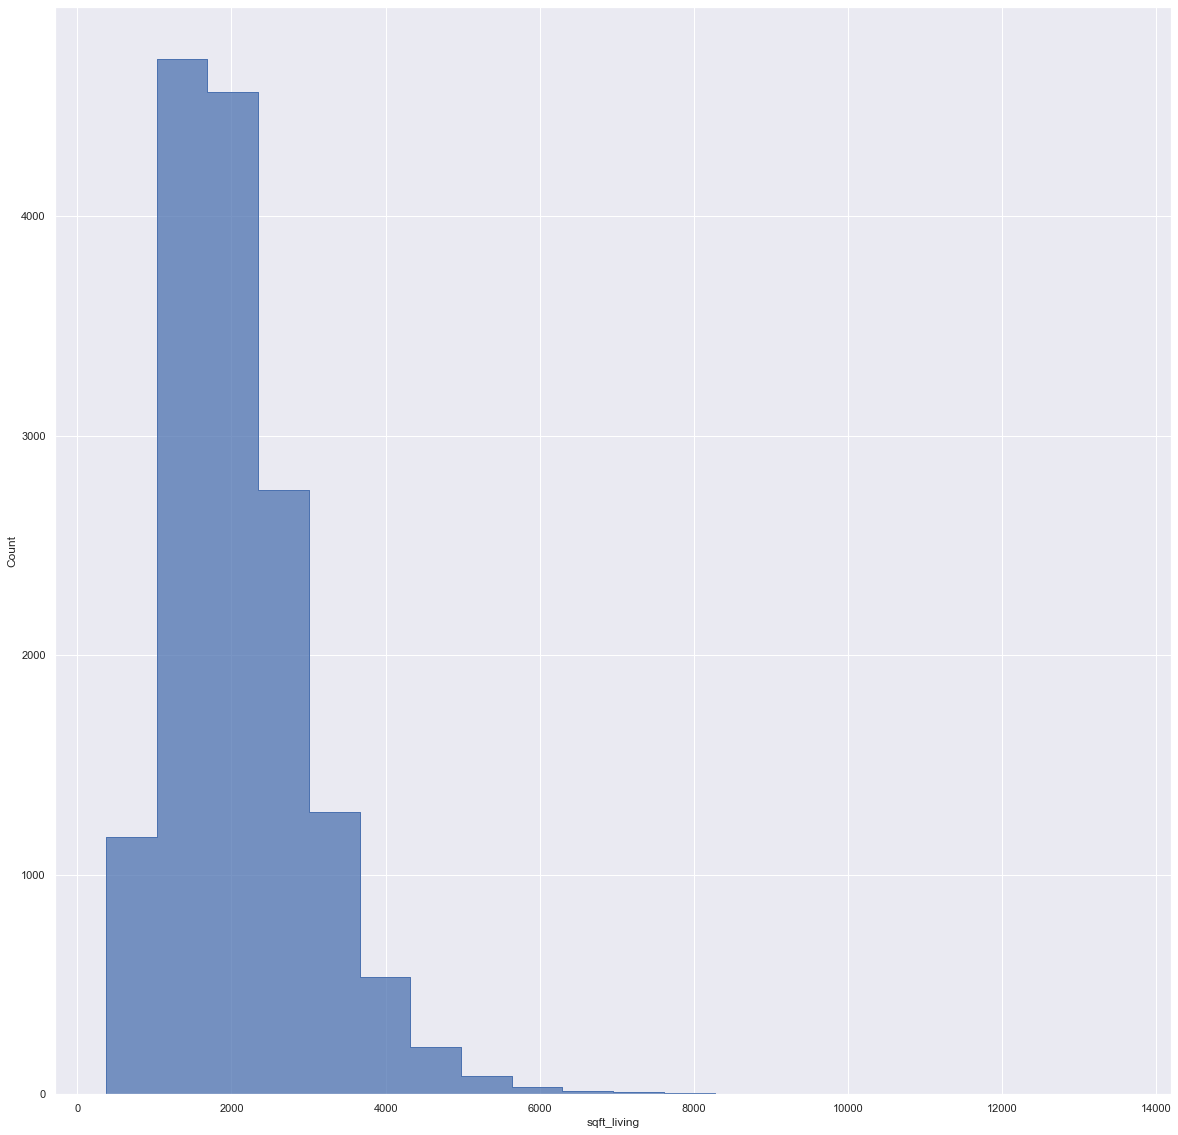

In [68]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df, x="sqft_living", element='step', bins = 20)
plt.show()
# Looking at distribution of homes by square foot living

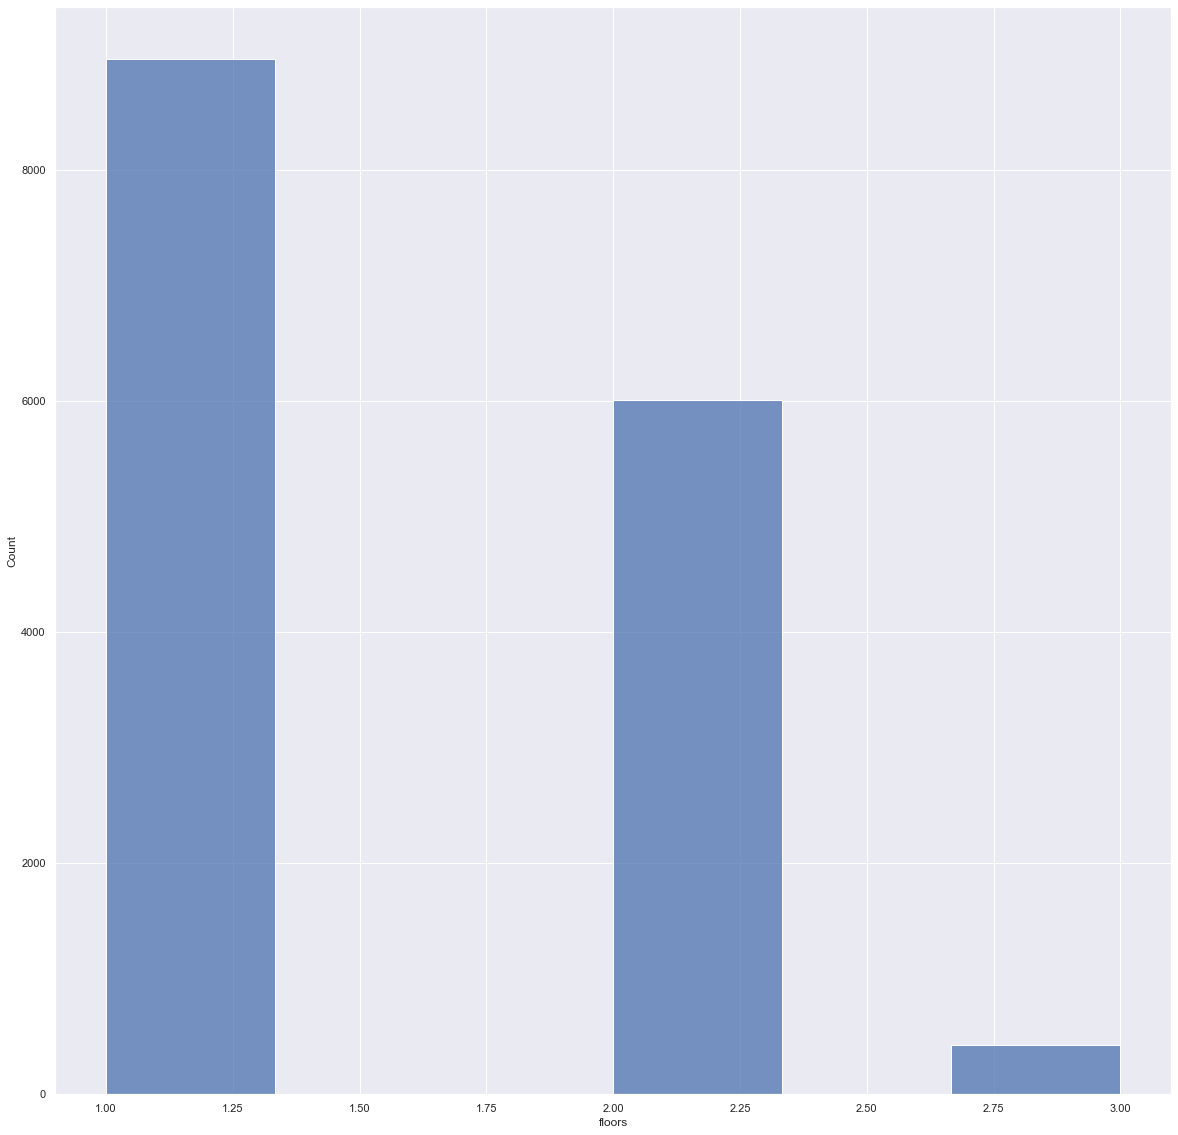

In [69]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df, x="floors", bins = 6)
plt.show()
# Looking at distribution of homes by floors

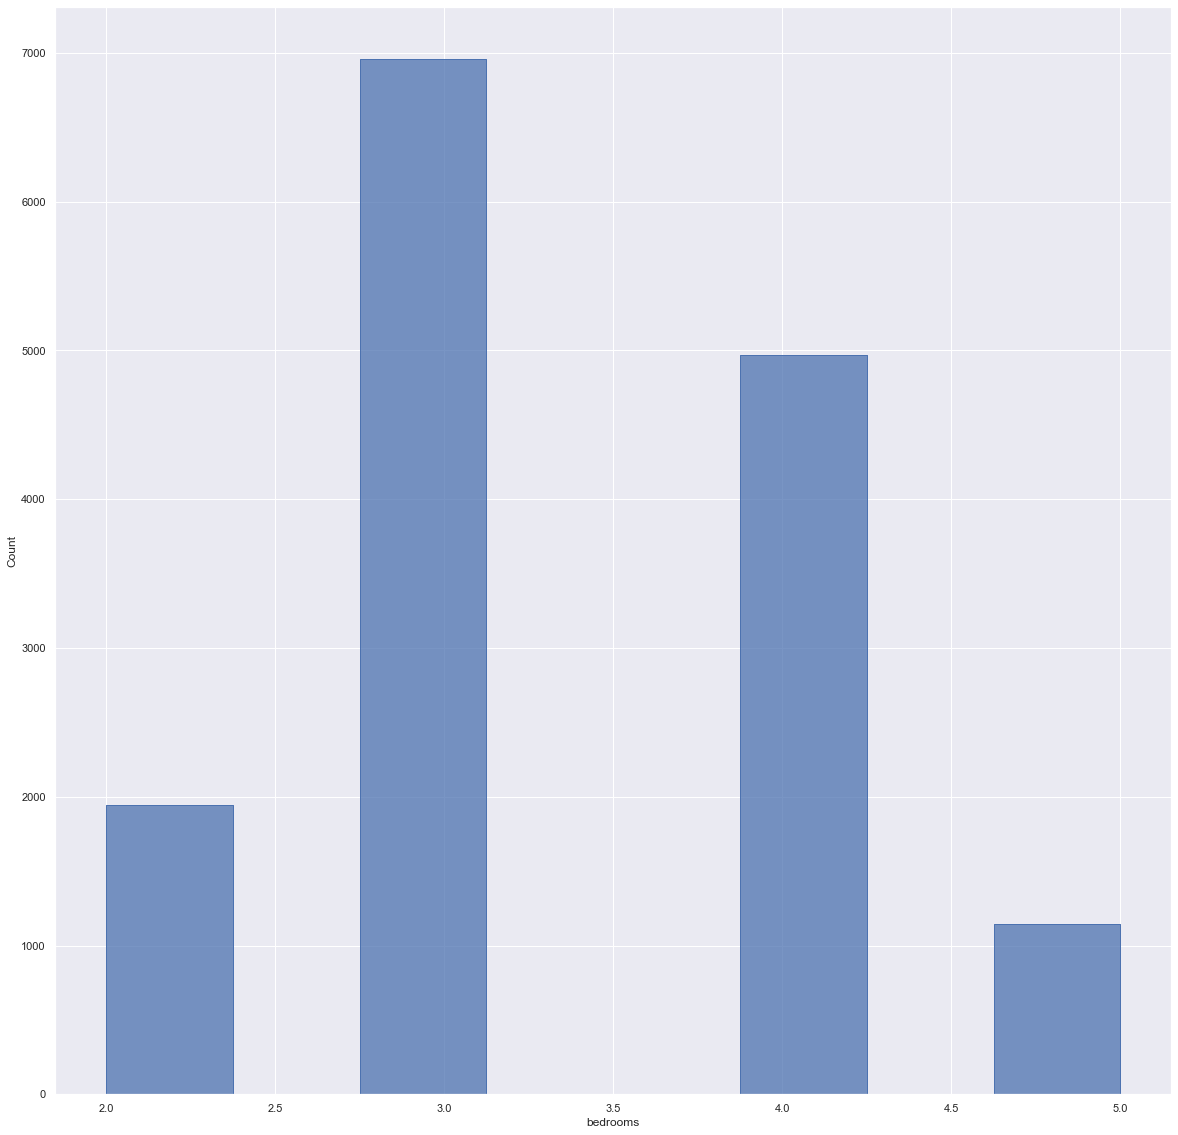

In [70]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip, x="bedrooms", element='step', bins = 8)
plt.show()
# Looking at distribution of homes by floors

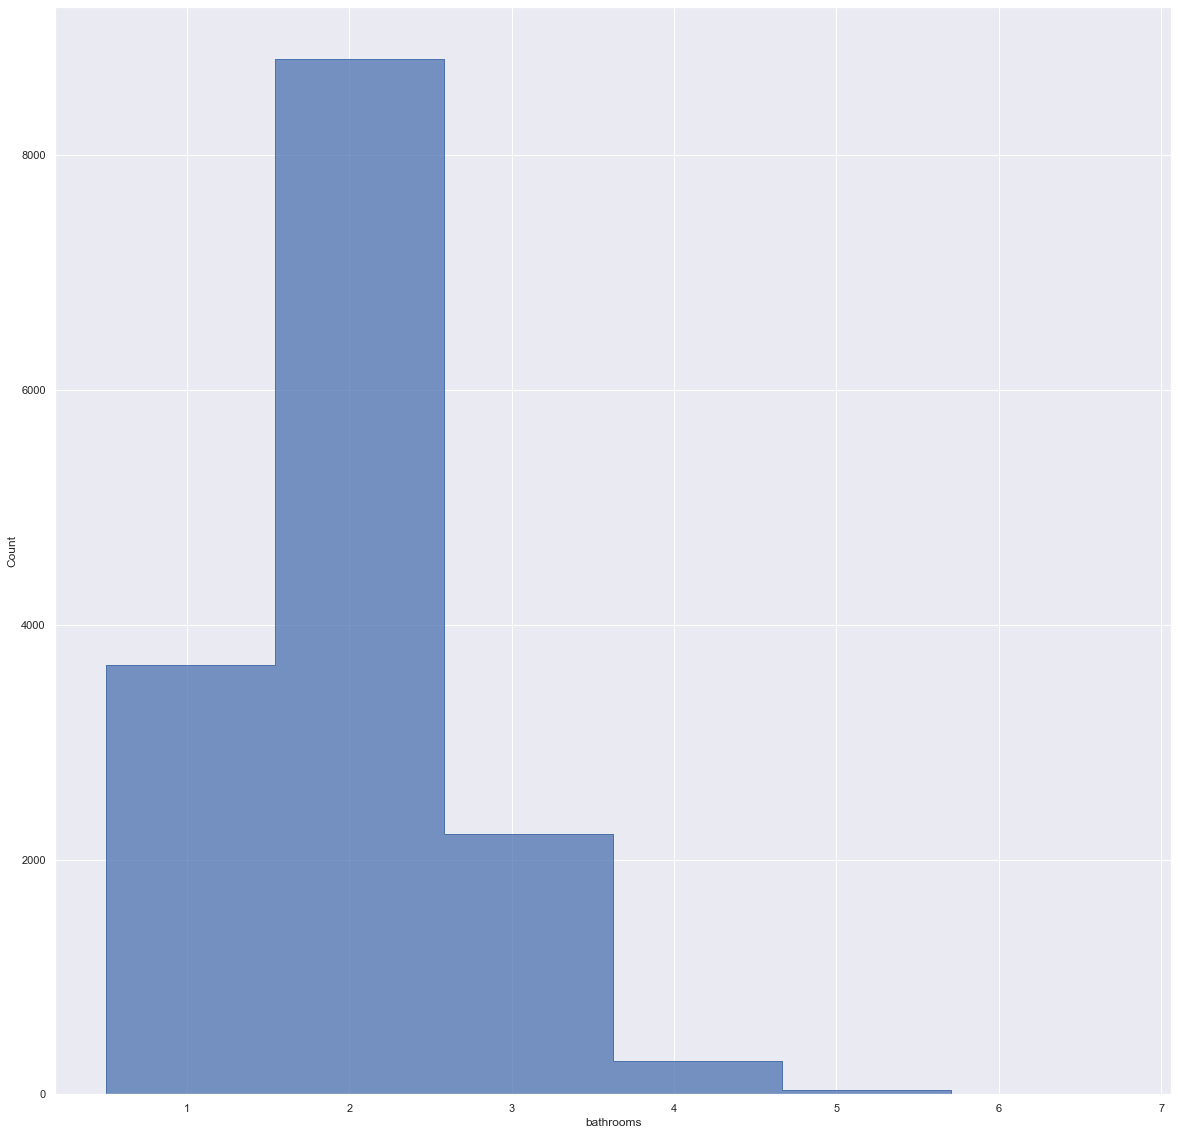

In [71]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip, x="bathrooms", element='step', bins = 6)
plt.show()
# Looking at distribution of homes by floors

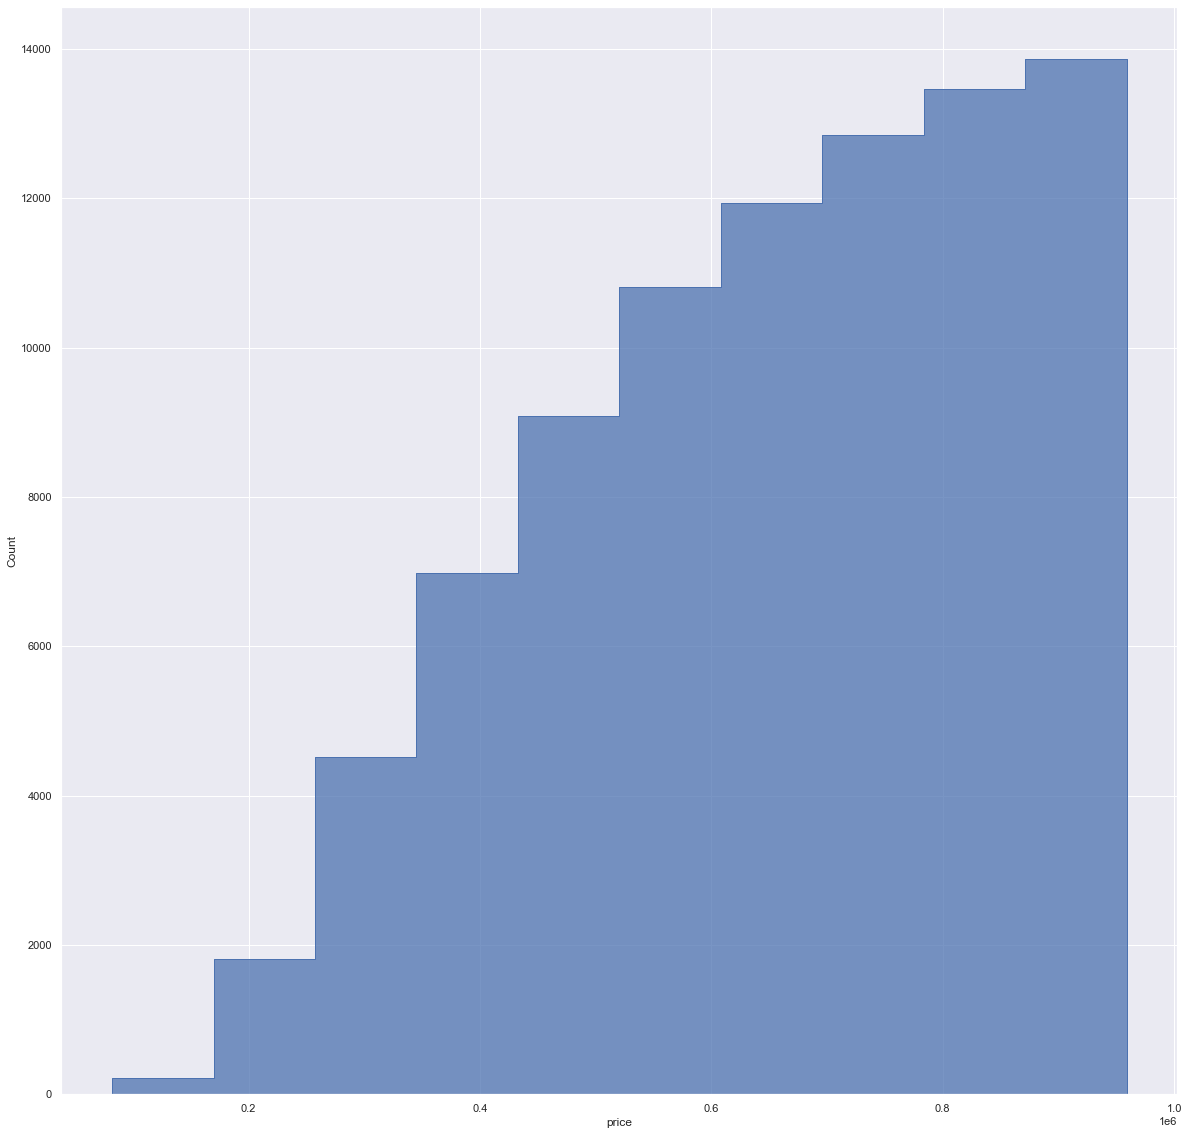

In [72]:
df_zip_no_out = data_clean('price', df_zip)
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip_no_out, x="price", element='step', bins = 10, cumulative = True)
plt.show()
# Looking at distribution of homes by floors cumulatively

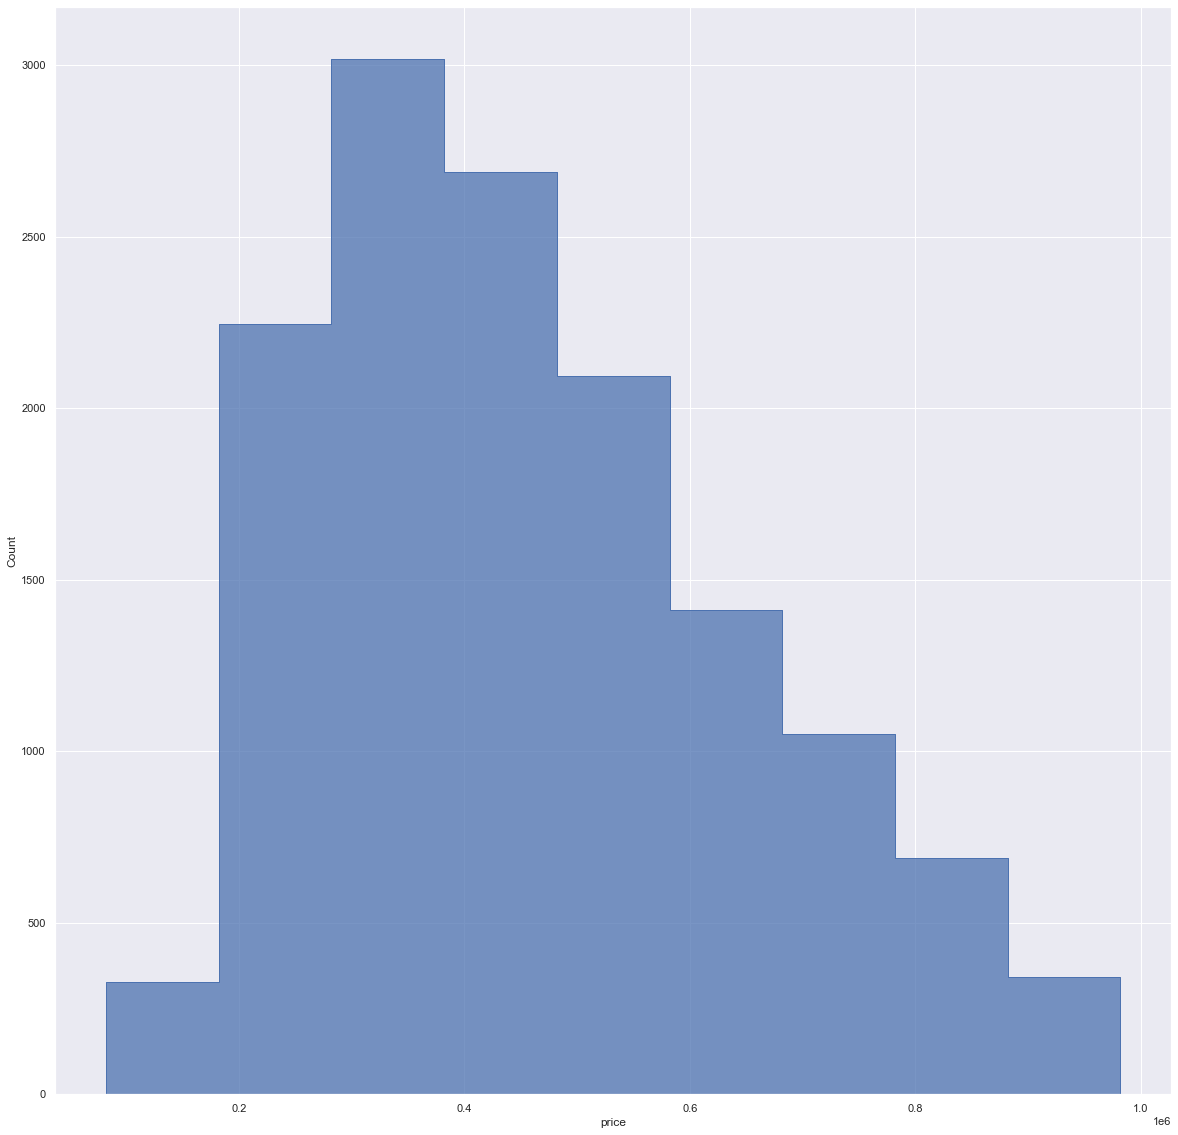

In [73]:
df_zip_no_out = data_clean('price', df_zip)
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip_no_out, x="price", element='step', binwidth = 100000)
plt.show()
# Looking at distribution of homes by floors 

<AxesSubplot:>

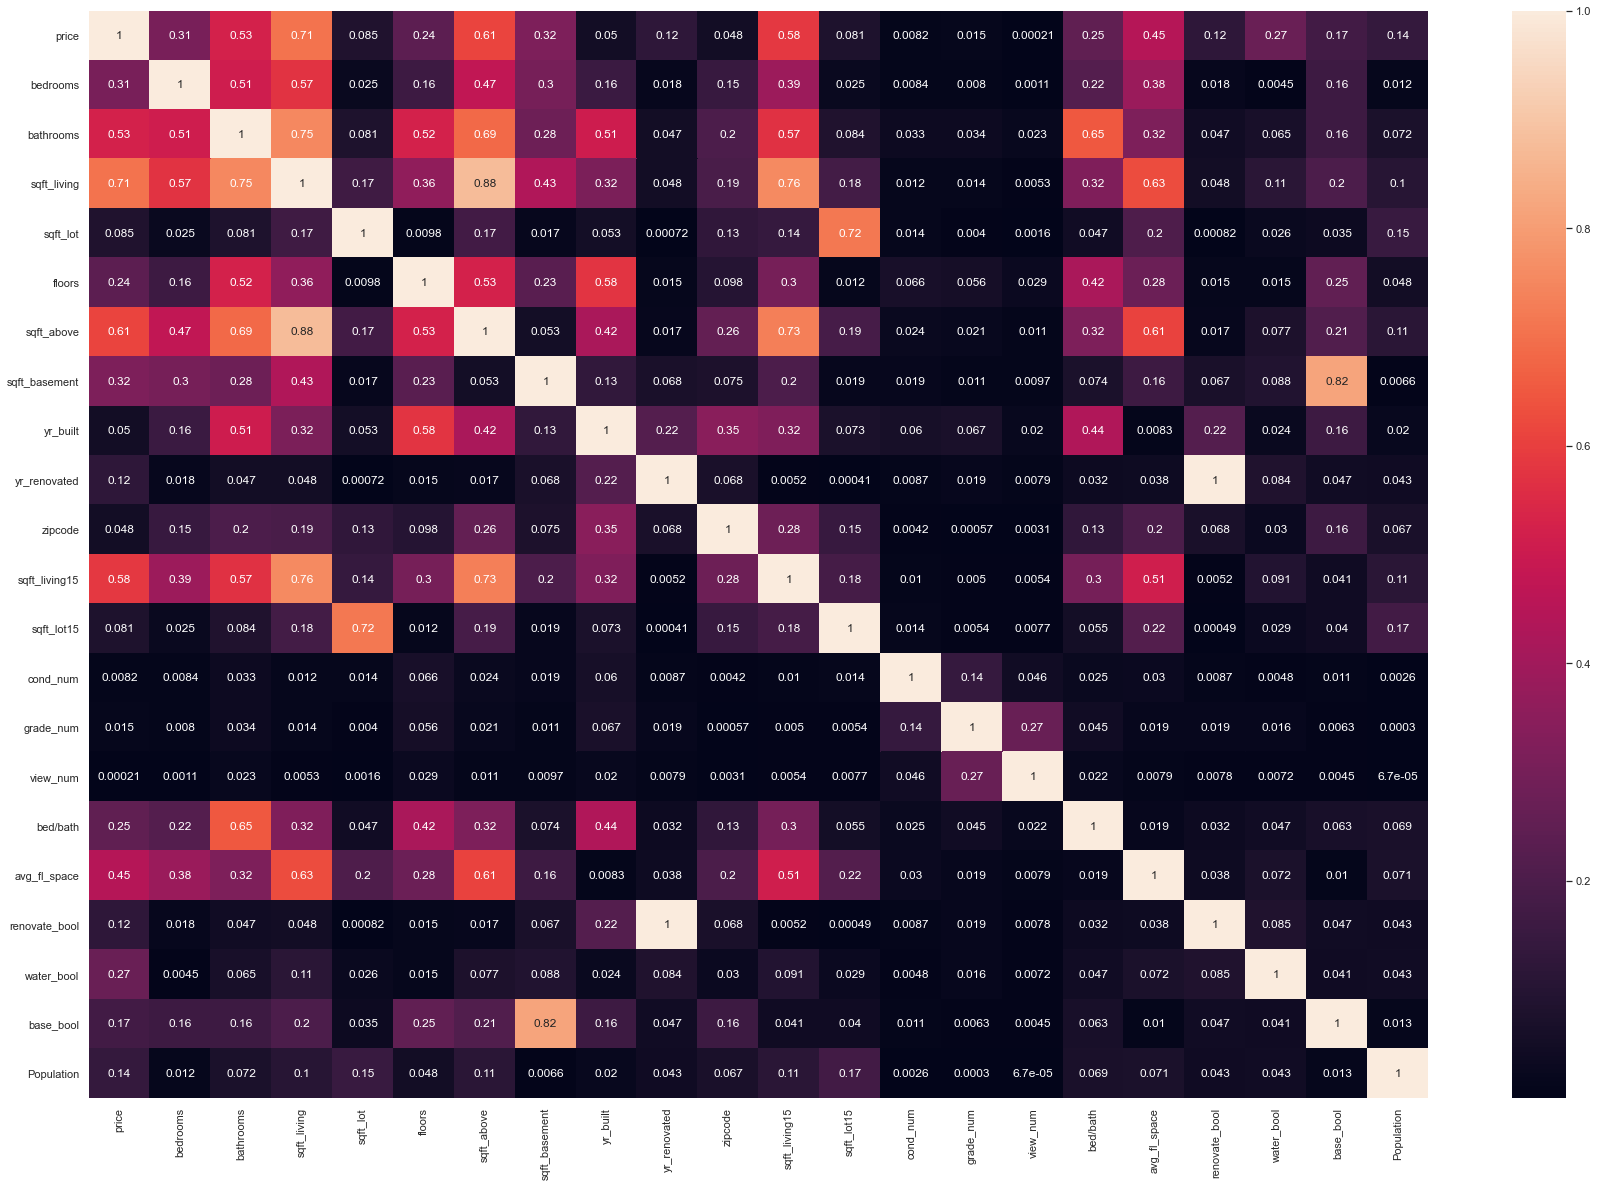

In [141]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr().abs(), annot = True)

In [75]:
df.shape

(15390, 24)

In [76]:
df_zip.shape

(15025, 93)

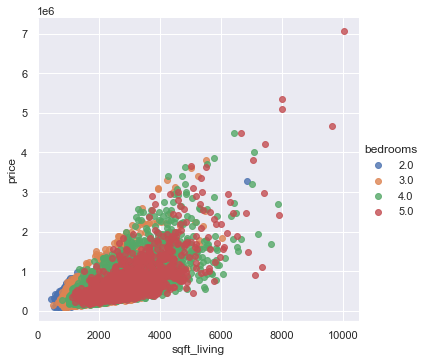

In [77]:
sns.lmplot( x="sqft_living", y="price", data=df_zip, fit_reg=False, hue='bedrooms', legend=True)


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

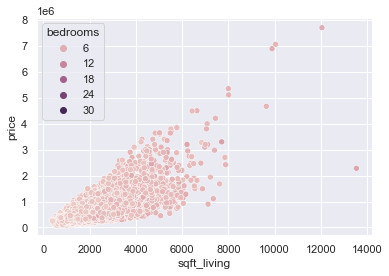

In [78]:
sns.scatterplot( x="sqft_living", y="price", data=df, hue='bedrooms', legend=True)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

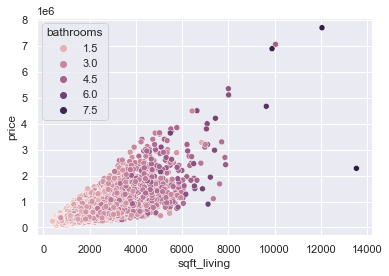

In [79]:
sns.scatterplot( x="sqft_living", y="price", data=df, hue='bathrooms', legend=True)

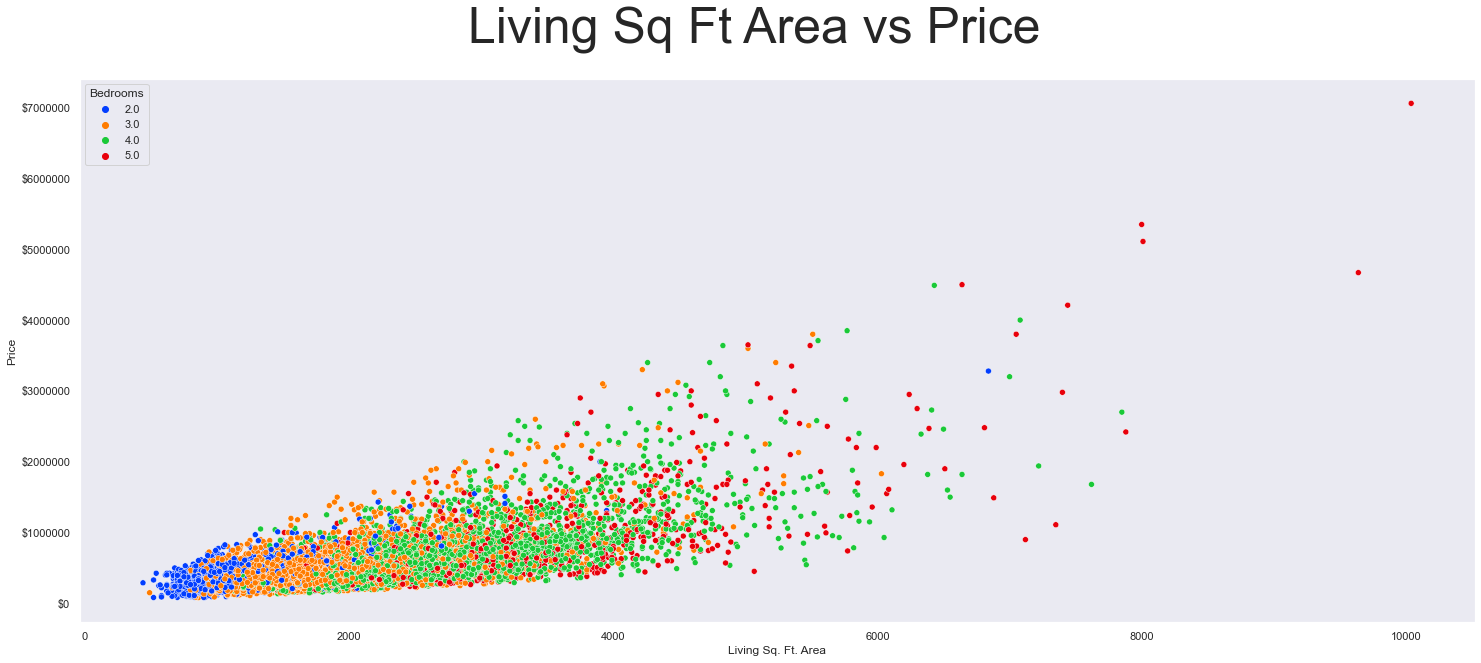

In [154]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df_zip, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

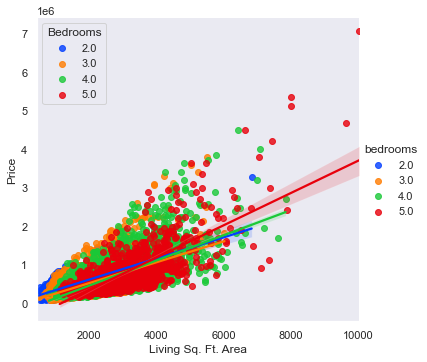

In [81]:
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lmplot(data = df_zip, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

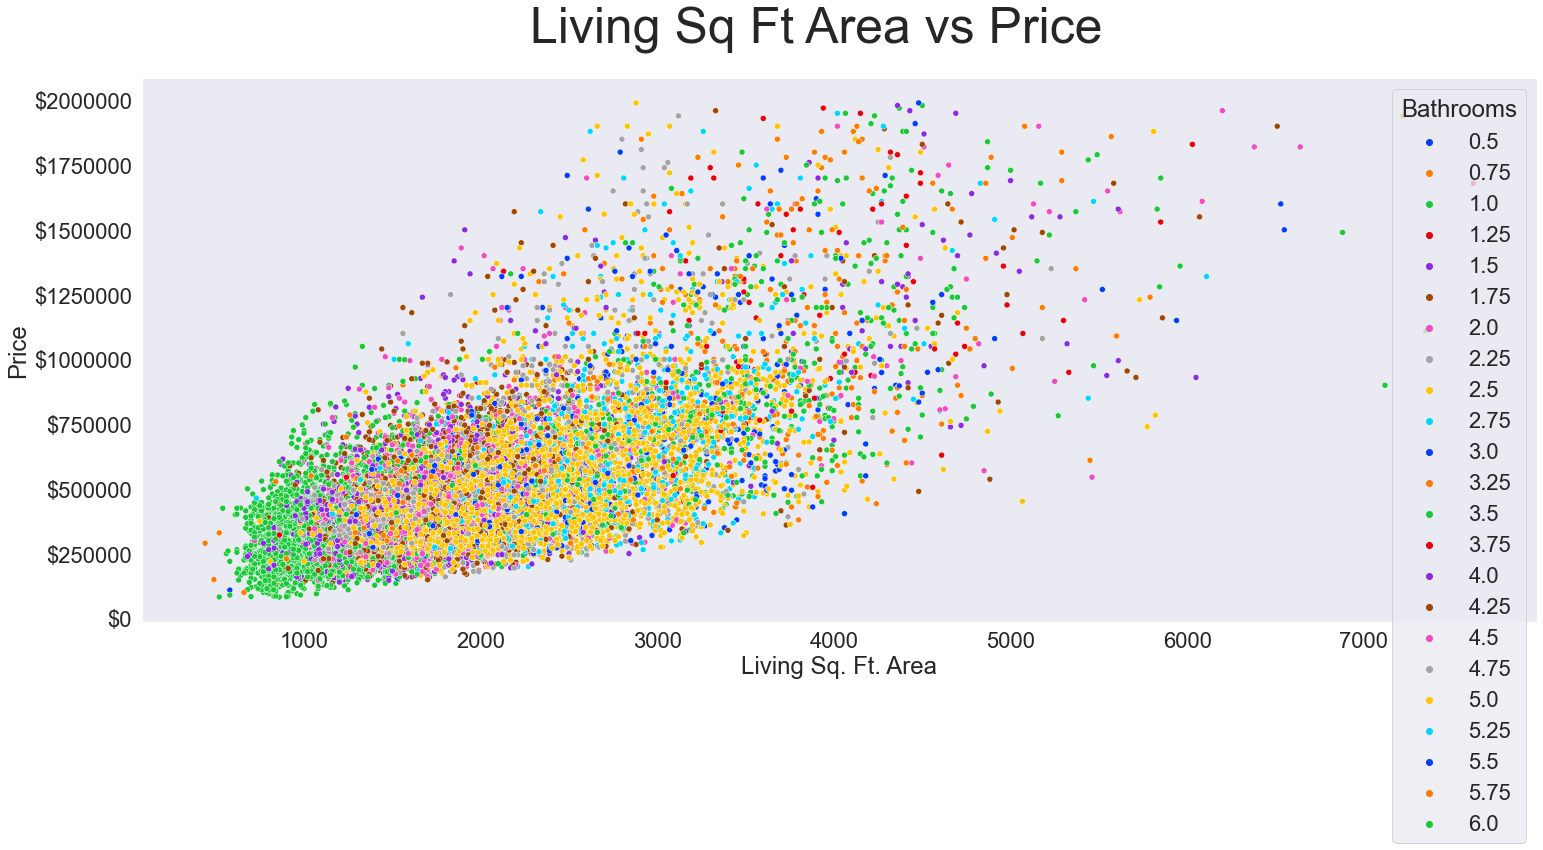

In [225]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df_2mil, x = 'sqft_living', y = 'price', hue = 'bathrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bathrooms')

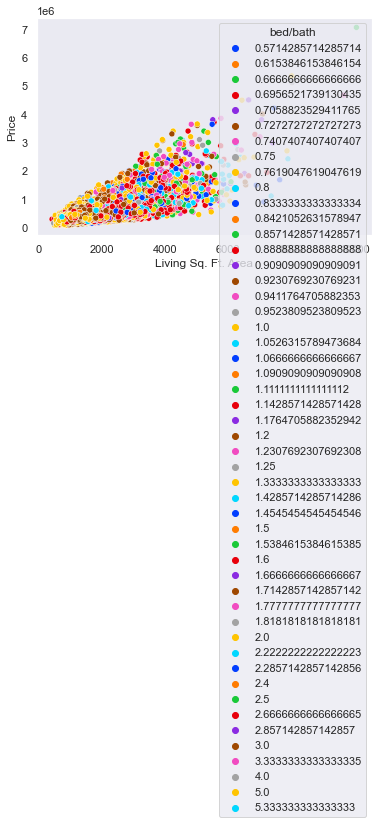

In [157]:
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df_zip, x = 'sqft_living', y = 'price', hue = 'bed/bath', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

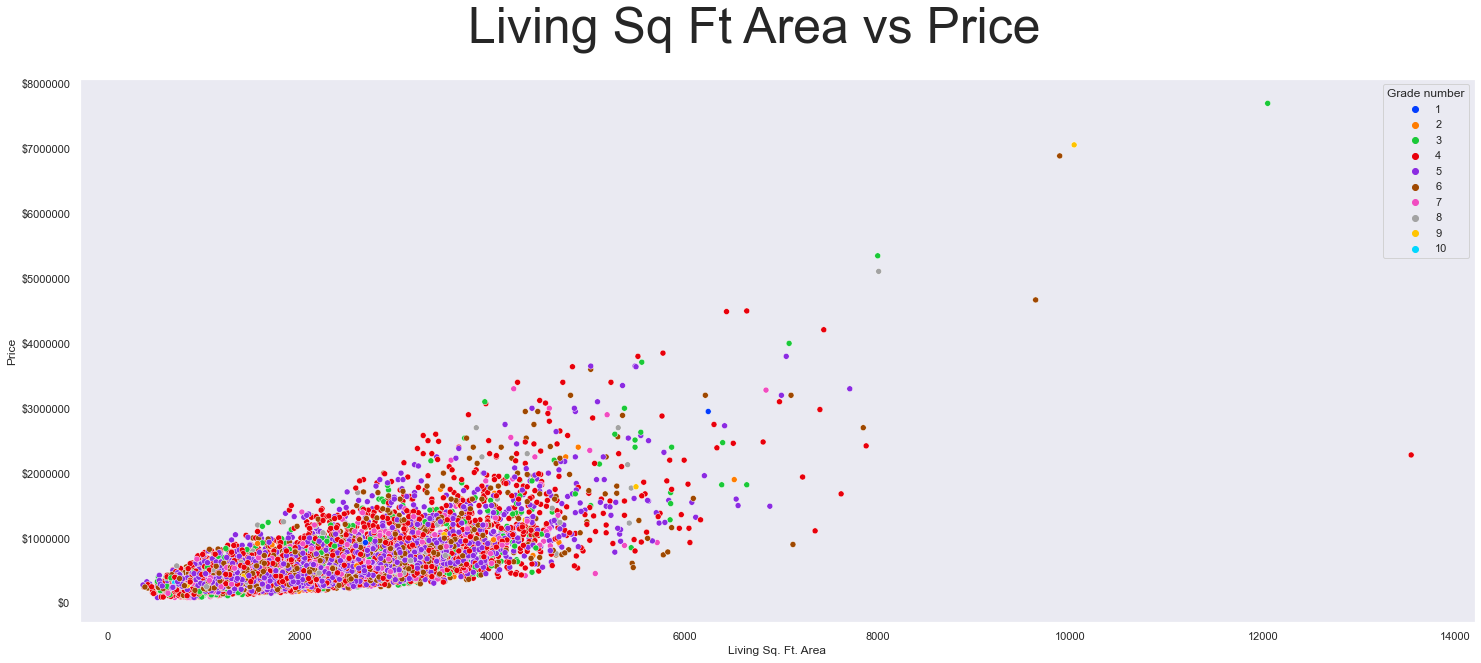

In [84]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'grade_num', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Grade number')

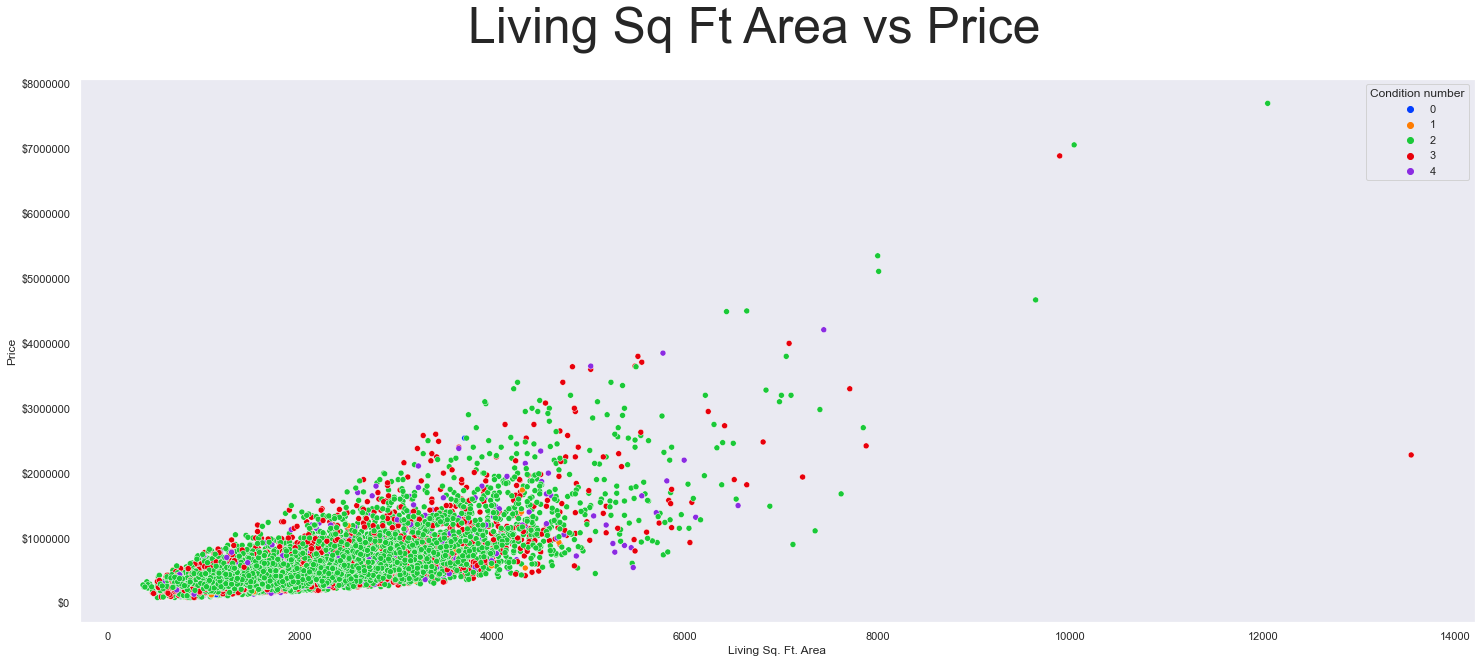

In [85]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'cond_num', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Condition number')

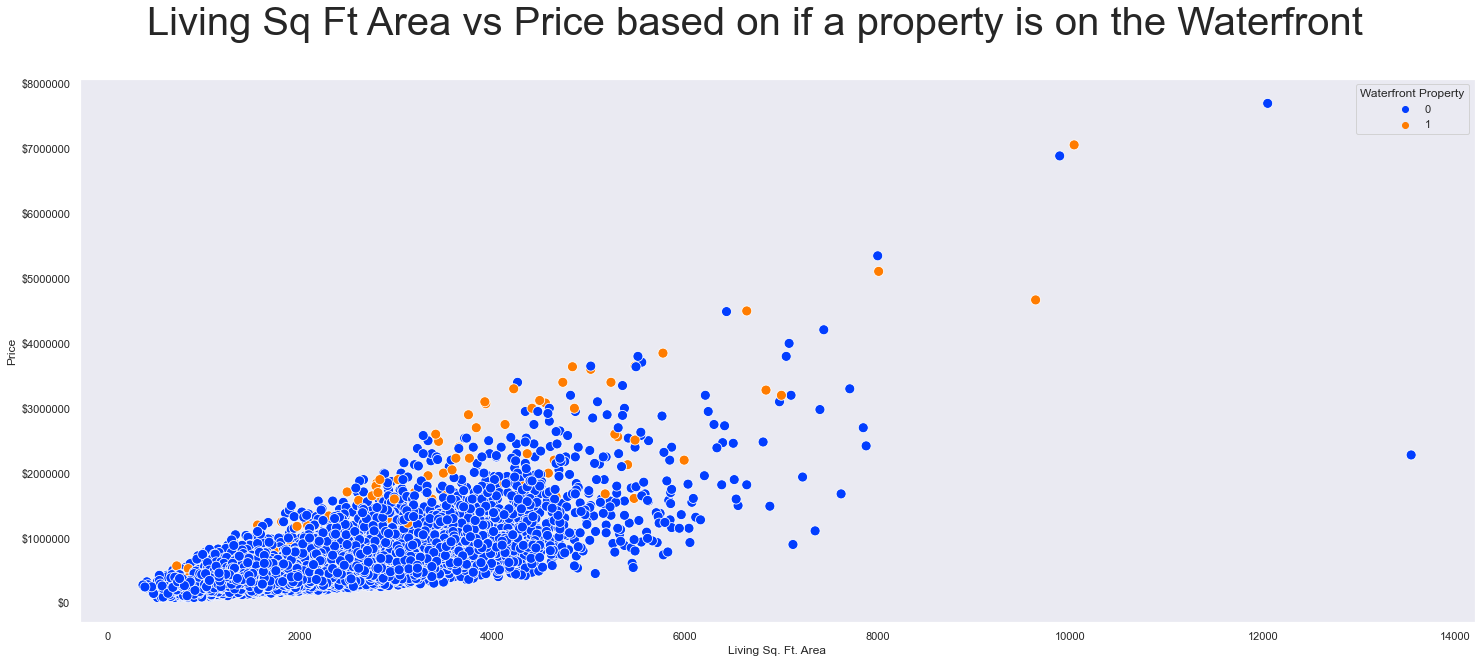

In [86]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price based on if a property is on the Waterfront', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'water_bool', s=100, palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Waterfront Property')

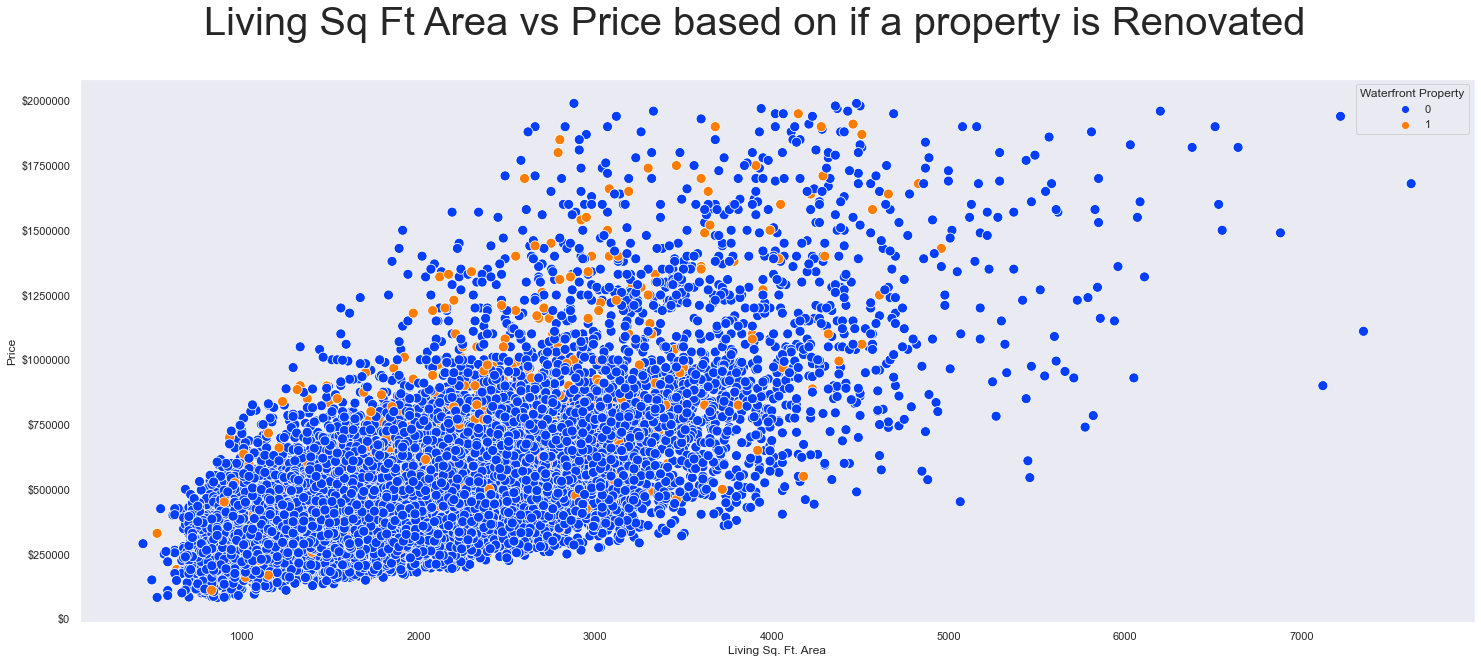

In [179]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price based on if a property is Renovated', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df_2mil, x = 'sqft_living', y = 'price', hue = 'renovate_bool', s=100, palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Waterfront Property')

In [181]:
df_2mil.renovate_bool.value_counts(normalize=True)

0    0.960913
1    0.039087
Name: renovate_bool, dtype: float64

In [144]:
fig.suptitle('Living Sq Ft Area vs Price on criteria of Waterfront or not', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.regplot(x= "sqft_living", y= "price", data= df, hue='water_bool', line_kws={"color":"r","alpha":0.7,"lw":5})
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

TypeError: regplot() got an unexpected keyword argument 'hue'

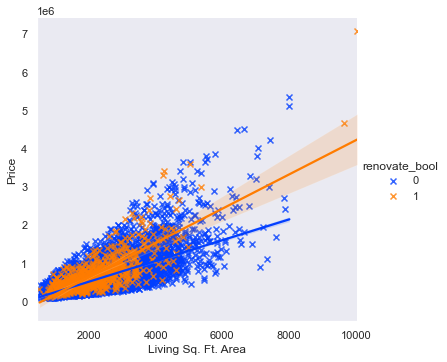

In [159]:
fig.suptitle('Living Sq Ft Area vs Price on criteria of Renovation', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lmplot(data = df_zip, x = 'sqft_living', y = 'price', hue = 'renovate_bool', markers = 'x', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

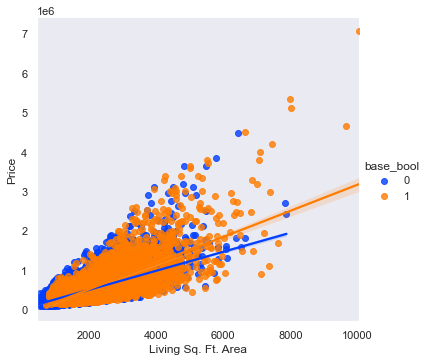

In [164]:
fig.suptitle('Living Sq Ft Area vs Price on criteria of Basement', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lmplot(data = df_zip, x = 'sqft_living', y = 'price', hue = 'base_bool', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

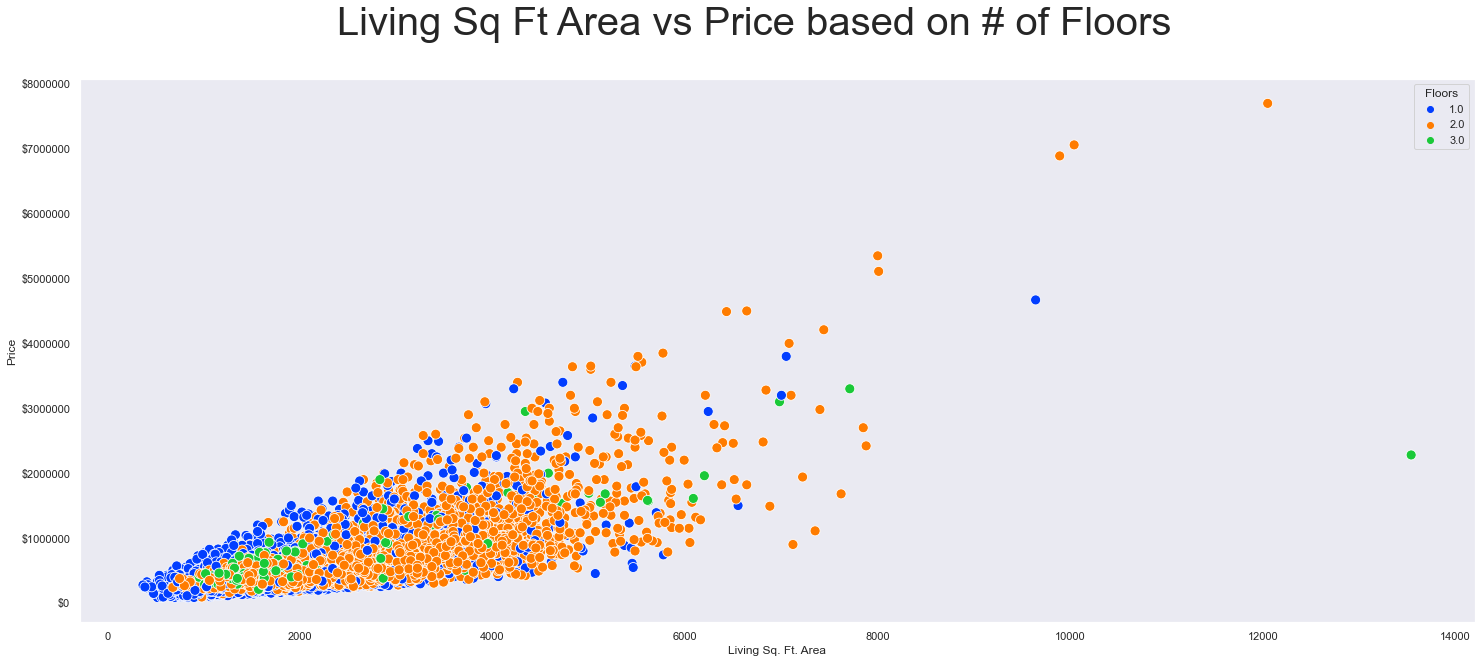

In [109]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price based on # of Floors', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'floors', s=100, palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Floors')

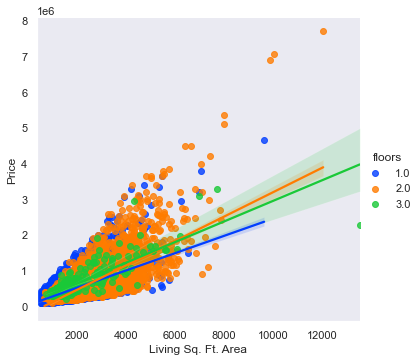

In [91]:
fig.suptitle('Living Sq Ft Area vs Price on criteria of Floors', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lmplot(data = df, x = 'sqft_living', y = 'price', hue = 'floors', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

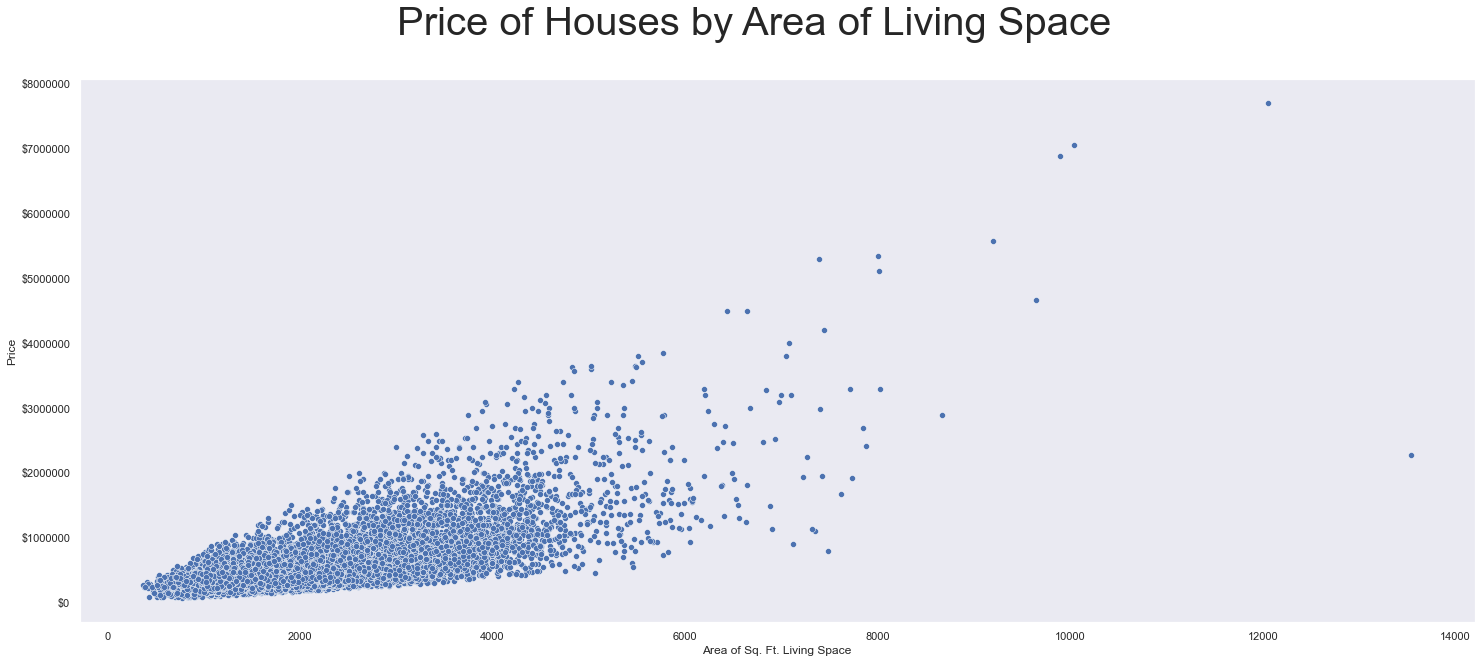

In [121]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Price of Houses by Area of Living Space', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.regplot(x= "sqft_living", y= "price", data= df_original, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.scatterplot(data = df_original, x = 'sqft_living', y = 'price', palette = 'bright').set(xlabel='Area of Sq. Ft. Living Space', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

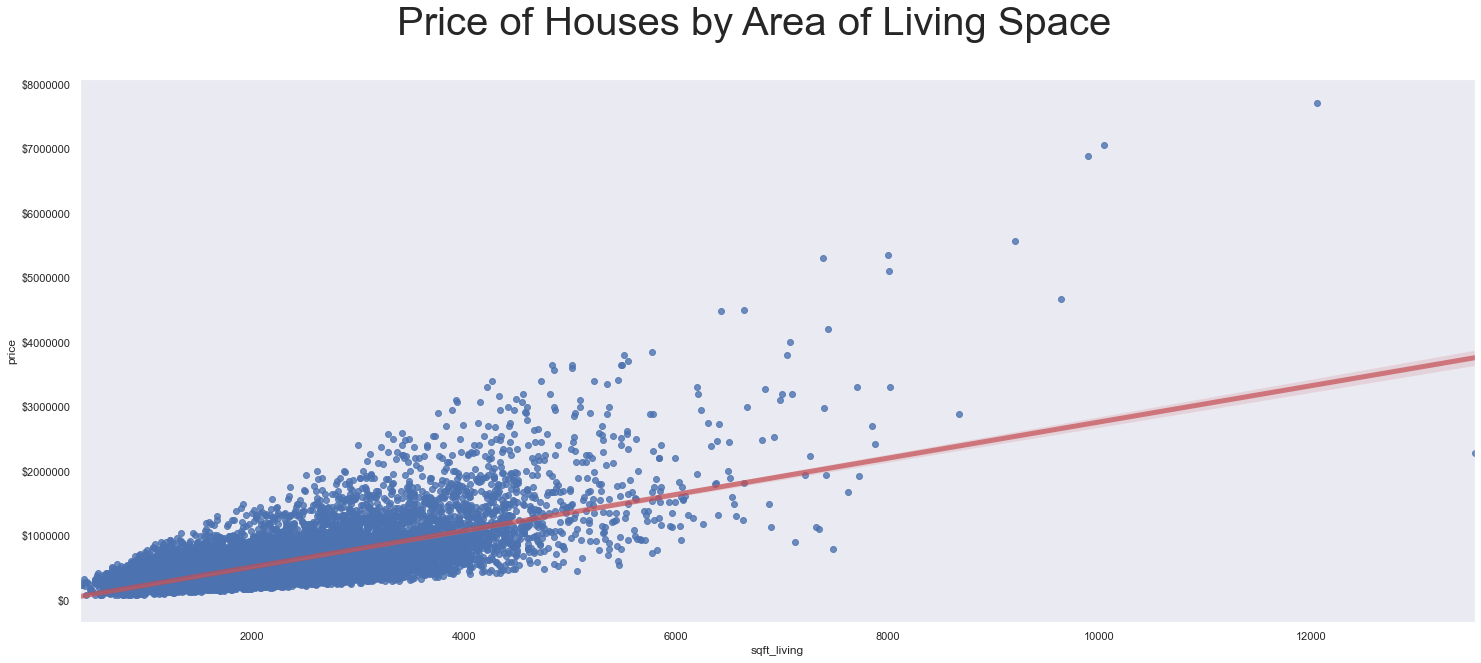

In [127]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Price of Houses by Area of Living Space', fontsize = 40)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.regplot(x= "sqft_living", y= "price", data= df_original, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel='Area of Sq. Ft. Living Space'
plt.ylabel='Price'
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

Text(0, 0.5, 'Price')

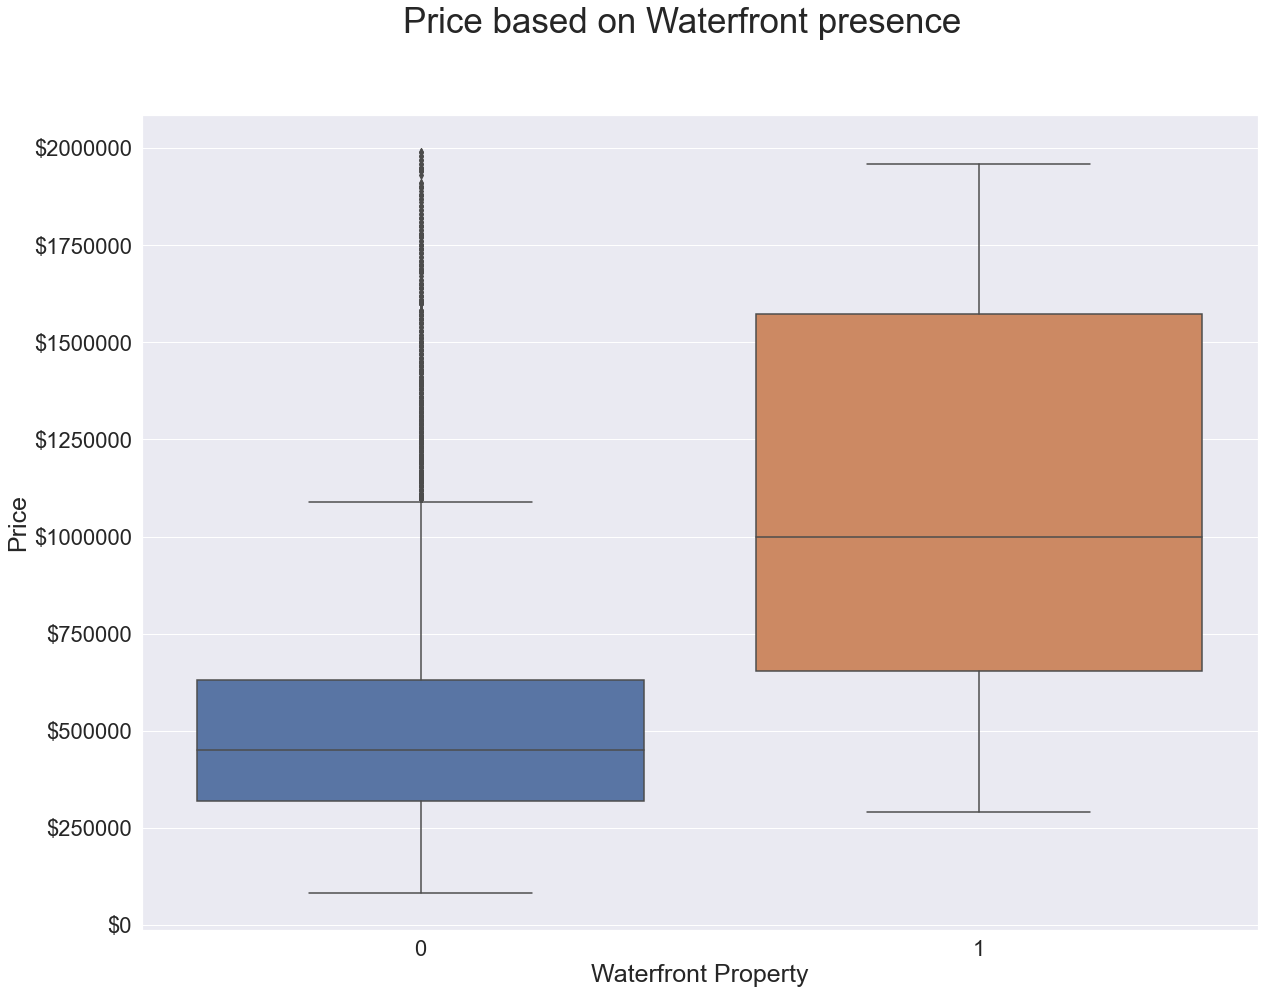

In [212]:
fig, axs = plt.subplots(figsize = (20,15))
sns.set(font_scale = 2)
fig.suptitle('Price based on Waterfront presence', fontsize = 35)
axs.yaxis.set_major_formatter('${x:1.0f}')
p = sns.boxplot( x=df_2mil["water_bool"], y=df_2mil["price"] )
p.set_xlabel('Waterfront Property', fontsize = 25)
p.set_ylabel('Price', fontsize = 25)

<AxesSubplot:xlabel='base_bool', ylabel='price'>

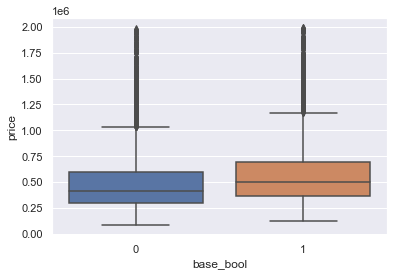

In [250]:
base = df_2mil.groupby(['base_bool'])['price'].median()
base

base_bool
0    415000.0
1    500000.0
Name: price, dtype: float64

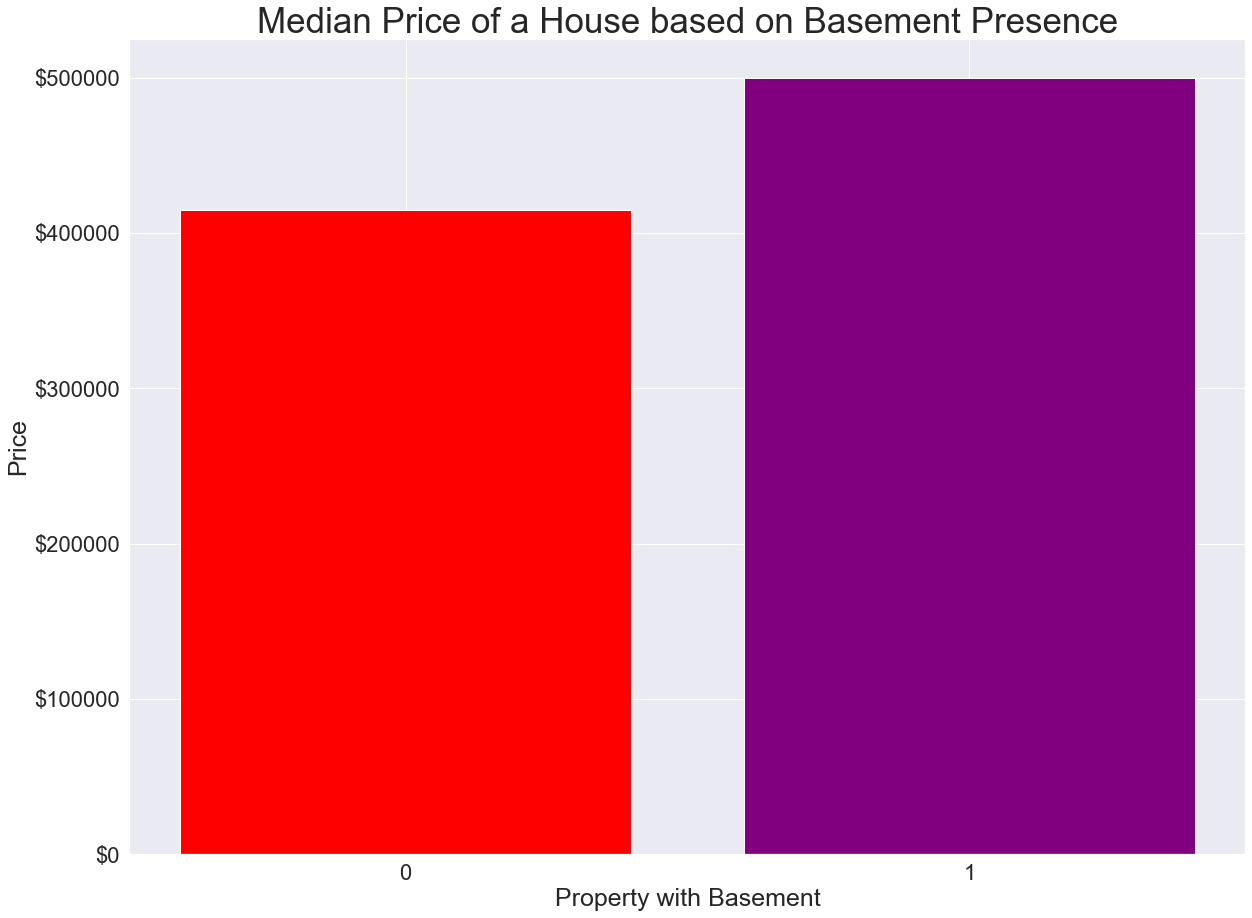

In [275]:
fig, axs = plt.subplots(figsize = (20, 15))
height = [415000, 500000]
bars = ('No Basement', 'Basement',)
y_pos = np.arange(len(bars))
plt.title('Median Price of a House based on Basement Presence', fontsize = 35)
axs.yaxis.set_major_formatter('${x:1.0f}')
plt.bar(y_pos, height, color=['red', 'purple',])
axs.set_ylabel('Price', fontsize = 25)
axs.set_xlabel('Property with Basement', fontsize = 25)
axs.set_xticks([0,1])
plt.show()

In [224]:
basesub.dtypes

price        float64
base_bool      int64
dtype: object